In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import datetime as dt

In [2]:
!pip install gdown

In [3]:
#msft
!gdown 'https://drive.google.com/uc?export=download&id=1HV5A7Wbqrfu9fxx4KlAZRrwe7iu51l0K'
#tatmotors
!gdown 'https://drive.google.com/uc?export=download&id=14Kdf2CZwt-TmS9FD35ChiwqiFm9QUowu'
#tcs
!gdown 'https://drive.google.com/uc?export=download&id=1bh7mHFAUwoW_CIl6RkNdTa74M_ONXXLd'
#reliance
!gdown 'https://drive.google.com/uc?export=download&id=1xV-6oHcueuYpp8s6h3iX37KyJ9TDCQMj'
#nifty bank
!gdown 'https://drive.google.com/uc?export=download&id=11MJOzb4QLGhstJb2CDsmw6C8ECBsi8Zd'
#nifty50
!gdown 'https://drive.google.com/uc?export=download&id=11f8_KeYOksOF1DGIHjEBlrBWmU3GdJkk'
#godrejindia
!gdown 'https://drive.google.com/uc?export=download&id=1c7dk0PI90KPsXLhMYSUTAeyKFVq8sbe-'
#bnbusdt
!gdown 'https://drive.google.com/uc?export=download&id=1gldfddA6O99ReLtfF8bZ0grHY9wQ1t79'
#btcusdt
!gdown 'https://drive.google.com/uc?export=download&id=1Xb4CpsjSrpA5KXYpQi4Jppn15N5JgbcL'
#dogeusdt
!gdown 'https://drive.google.com/uc?export=download&id=1pN1p3JXCeBeRF4Cdfl4TbIOt86MKJInS'
#ehusdt
!gdown 'https://drive.google.com/uc?export=download&id=1wRiIhbu5UPA9tyI9Bie_d3s_7hLJO5th'
#solusdt
!gdown 'https://drive.google.com/uc?export=download&id=1sTK5z_uiB8FYbdpVQjI0nmCn69xATOrm'
#audusd
!gdown 'https://drive.google.com/uc?export=download&id=1Zn_-DYiXB8oN1Hzilo7NrWUzhhV1F4vu'
#eurusd
!gdown 'https://drive.google.com/uc?export=download&id=1cfUt_l4dSzm9T-U1uupVtRSyrncpdqlY'
#gbpusd
!gdown 'https://drive.google.com/uc?export=download&id=1qreCd-9VpVPmHymw3YiCxxQnPS6zP0w2'
#usdcad
!gdown 'https://drive.google.com/uc?export=download&id=1J1WvB8Y8kJesPE__6LlJuZUF1rFBReEJ'
#usdjpy
!gdown 'https://drive.google.com/uc?export=download&id=1jpfIHtC0Kuv00kU8DLmLPxf5YYzNQnla'
#aapl
!gdown 'https://drive.google.com/uc?export=download&id=17Rv4g5pUbdlfU-Zsu7PGtGAxfTLjRYm9'
#amzn
!gdown 'https://drive.google.com/uc?export=download&id=1WmZPKRIu5IPwyov6DSh11WD2yLR1TbQ3'
#dow
!gdown 'https://drive.google.com/uc?export=download&id=1L_sKTIxpVk89PAqFU0RF0d2roTjZhtxz'
#gs
!gdown 'https://drive.google.com/uc?export=download&id=1Ig_TkrXuEFu_az78h-QIgjjjF9PYejZv'
#meta
!gdown 'https://drive.google.com/uc?export=download&id=1K7T7D4pnz9189rRJhRj_OTvGaUS9kmfx'


Downloading...
From: https://drive.google.com/uc?export=download&id=1HV5A7Wbqrfu9fxx4KlAZRrwe7iu51l0K
To: /content/MSFT_1d.csv
100% 214k/214k [00:00<00:00, 31.2MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=14Kdf2CZwt-TmS9FD35ChiwqiFm9QUowu
To: /content/TATAMOTORS_1d.csv
100% 222k/222k [00:00<00:00, 70.7MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1bh7mHFAUwoW_CIl6RkNdTa74M_ONXXLd
To: /content/TCS_1d.csv
100% 232k/232k [00:00<00:00, 73.7MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1xV-6oHcueuYpp8s6h3iX37KyJ9TDCQMj
To: /content/RELIANCE_1d.csv
100% 227k/227k [00:00<00:00, 23.7MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=11MJOzb4QLGhstJb2CDsmw6C8ECBsi8Zd
To: /content/NIFTY BANK_1d.csv
100% 226k/226k [00:00<00:00, 63.5MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=11f8_KeYOksOF1DGIHjEBlrBWmU3GdJkk
To: /content/NIFTY 50_1d.csv
100% 220k/220k [00:00<00

In [4]:
ETHUSDT = pd.read_csv('ETHUSDT_1d.csv', parse_dates=True, index_col='timestamp')
EURUSD = pd.read_csv('EURUSD_1d.csv', parse_dates=True, index_col='DateTime')
TCS = pd.read_csv('TCS_1d.csv', parse_dates=True, index_col='date')
NIFTY50 = pd.read_csv('NIFTY 50_1d.csv', parse_dates=True, index_col='date')
AMZN = pd.read_csv('AMZN_1d.csv', parse_dates=True, index_col='timestamp')
AAPL= pd.read_csv('AAPL_1d.csv', parse_dates=True, index_col='timestamp')
AUDUSD=pd.read_csv('AUDUSD_1d.csv', parse_dates=True, index_col='DateTime')
BNBUSDT=pd.read_csv('BNBUSDT_1d.csv', parse_dates=True, index_col='timestamp')
DOGEUSDT=pd.read_csv('DOGEUSDT_1d.csv', parse_dates=True, index_col='timestamp')
BTCUSDT=pd.read_csv('BTCUSDT_1d.csv', parse_dates=True, index_col='timestamp')
SOLUSDT=pd.read_csv('SOLUSDT_1d.csv', parse_dates=True, index_col='timestamp')
DOW=pd.read_csv('DOW_1d.csv', parse_dates=True, index_col='timestamp')
GBPUSD=pd.read_csv('GBPUSD_1d.csv', parse_dates=True, index_col='DateTime')
GS=pd.read_csv('GS_1d.csv', parse_dates=True, index_col='timestamp')
META=pd.read_csv('META_1d.csv', parse_dates=True, index_col='timestamp')
GODREJIND=pd.read_csv('GODREJIND_1d.csv', parse_dates=True, index_col='date')
MSFT=pd.read_csv('MSFT_1d.csv', parse_dates=True, index_col='timestamp')
RELIANCE=pd.read_csv('RELIANCE_1d.csv', parse_dates=True, index_col='date')
NIFTYBANK=pd.read_csv('NIFTY BANK_1d.csv', parse_dates=True, index_col='date')
TATAMOTORS=pd.read_csv('TATAMOTORS_1d.csv', parse_dates=True, index_col='date')
USDCAD=pd.read_csv('USDCAD_1d.csv', parse_dates=True, index_col='DateTime')
USDJPY=pd.read_csv('USDJPY_1d.csv', parse_dates=True, index_col='DateTime')

<ipython-input-4-eefb1c329231>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  GS=pd.read_csv('GS_1d.csv', parse_dates=True, index_col='timestamp')
<ipython-input-4-eefb1c329231>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  META=pd.read_csv('META_1d.csv', parse_dates=True, index_col='timestamp')


In [5]:
datasets = {'ETHUSDT': ETHUSDT, 'EURUSD': EURUSD, 'TCS': TCS, 'NIFTY50': NIFTY50, 'AMZN': AMZN, 'AAPL': AAPL,
            'AUDUSD': AUDUSD, 'BNBUSDT': BNBUSDT, 'DOGEUSDT': DOGEUSDT, 'BTCUSDT': BTCUSDT, 'SOLUSDT': SOLUSDT,
            'DOW': DOW, 'GBPUSD': GBPUSD, 'GS': GS, 'META': META, 'GODREJIND': GODREJIND, 'MSFT': MSFT,
            'RELIANCE': RELIANCE, 'NIFTYBANK': NIFTYBANK, 'TATAMOTORS': TATAMOTORS, 'USDCAD': USDCAD, 'USDJPY': USDJPY}

for name, df in datasets.items():
    df.index.name = 'DateTime'

In [6]:
TCS['DateTime'] = TCS.index.date
GODREJIND['DateTime'] = GODREJIND.index.date
NIFTY50['DateTime'] = NIFTY50.index.date
NIFTYBANK['DateTime'] = NIFTYBANK.index.date
RELIANCE['DateTime'] = RELIANCE.index.date
TATAMOTORS['DateTime'] = TATAMOTORS.index.date


AAPL['DateTime'] = AAPL.index.date
AMZN['DateTime'] = AMZN.index.date
DOW['DateTime'] = DOW.index.date
MSFT['DateTime'] = MSFT.index.date

AUDUSD['DateTime'] = AUDUSD.index.date
EURUSD['DateTime'] = EURUSD.index.date
GBPUSD['DateTime'] = GBPUSD.index.date
USDCAD['DateTime'] = USDCAD.index.date
USDJPY['DateTime'] = USDJPY.index.date

GS['DateTime'] = pd.to_datetime(GS.index, unit='ms')
META['DateTime'] = pd.to_datetime(META.index, unit='ms')
GS['DateTime'] = GS['DateTime'].dt.date
META['DateTime'] = META['DateTime'].dt.date

In [7]:
def clean_data(df):
    df.index = pd.to_datetime(df.index)
    df.index = df.index.tz_localize(None)
    df = df[~df.index.duplicated(keep='first')]
    return df

GS = clean_data(GS)
META = clean_data(META)
ETHUSDT = clean_data(ETHUSDT)
EURUSD = clean_data(EURUSD)
TCS = clean_data(TCS)
NIFTY50 = clean_data(NIFTY50)
NIFTYBANK = clean_data(NIFTYBANK)
RELIANCE = clean_data(RELIANCE)
TATAMOTORS = clean_data(TATAMOTORS)
AAPL = clean_data(AAPL)
AMZN = clean_data(AMZN)
AUDUSD = clean_data(AUDUSD)
BNBUSDT = clean_data(BNBUSDT)
DOGEUSDT = clean_data(DOGEUSDT)
BTCUSDT = clean_data(BTCUSDT)
SOLUSDT = clean_data(SOLUSDT)
DOW = clean_data(DOW)
GBPUSD = clean_data(GBPUSD)
USDCAD = clean_data(USDCAD)
USDJPY = clean_data(USDJPY)
MSFT=clean_data(MSFT)
GODREJIND=clean_data(GODREJIND)

total=[]


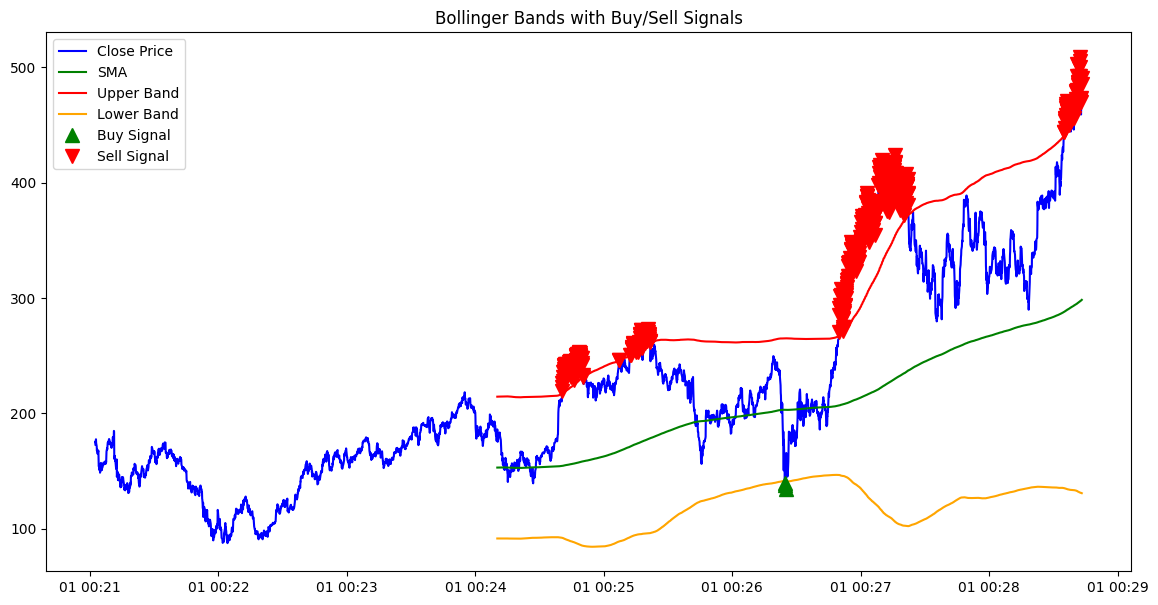

Total return: -14.51%


In [8]:
df=GS.copy()

# Parameters
window = 1500
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")


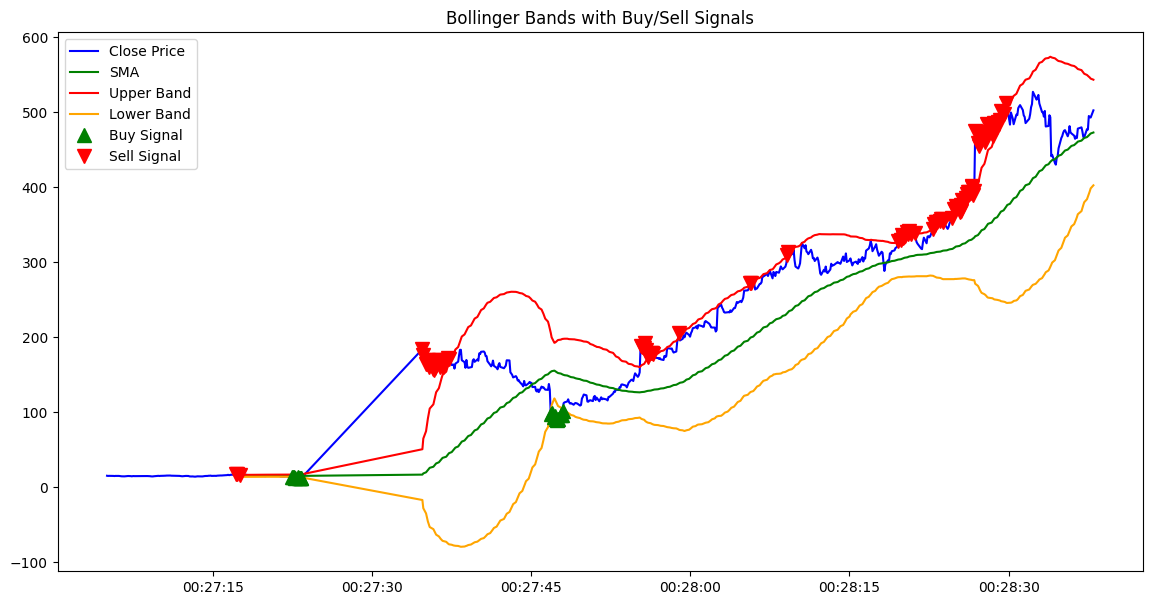

Total return: 1142.52%


In [9]:
df=META.copy()

# Parameters
window = 100
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

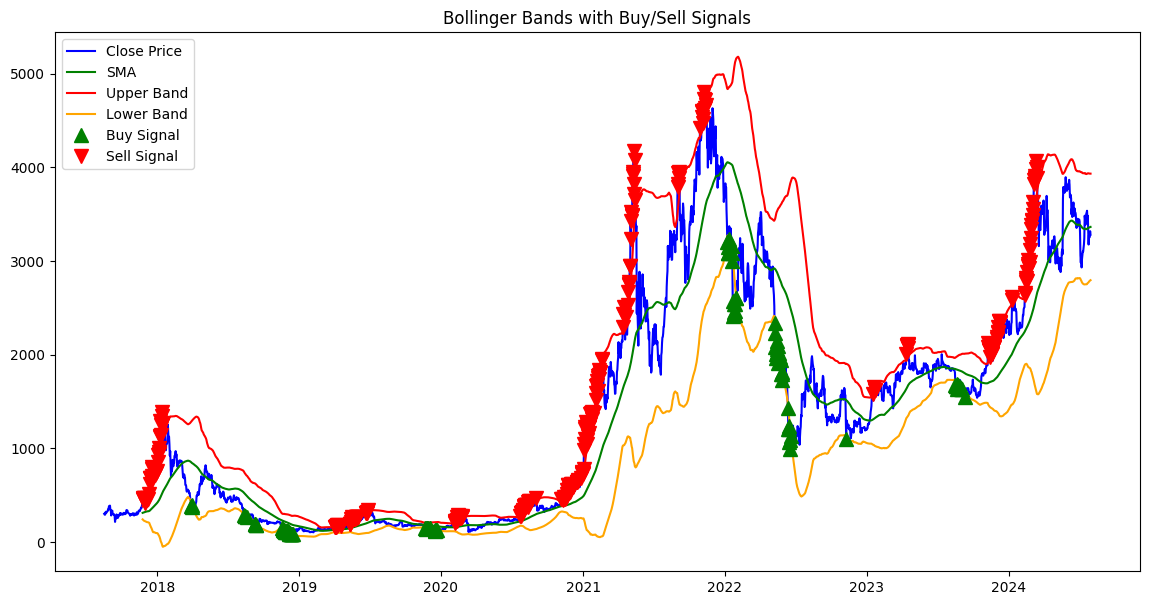

Total return: -94.25%


In [10]:
df=ETHUSDT.copy()

# Parameters
window = 100
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

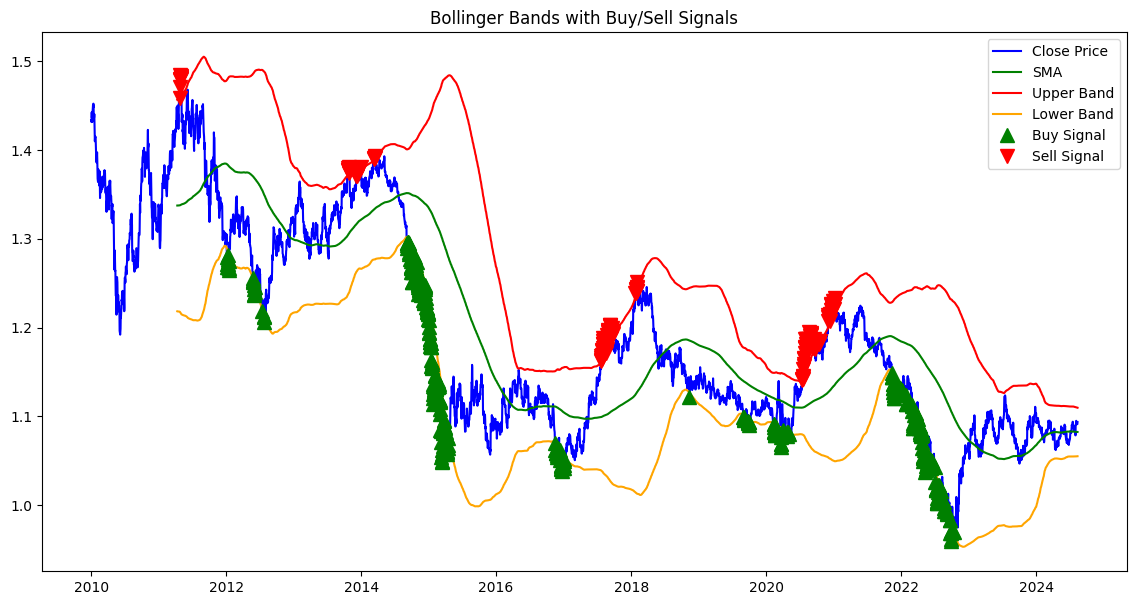

Total return: -5.49%


In [11]:
df=EURUSD.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 400
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

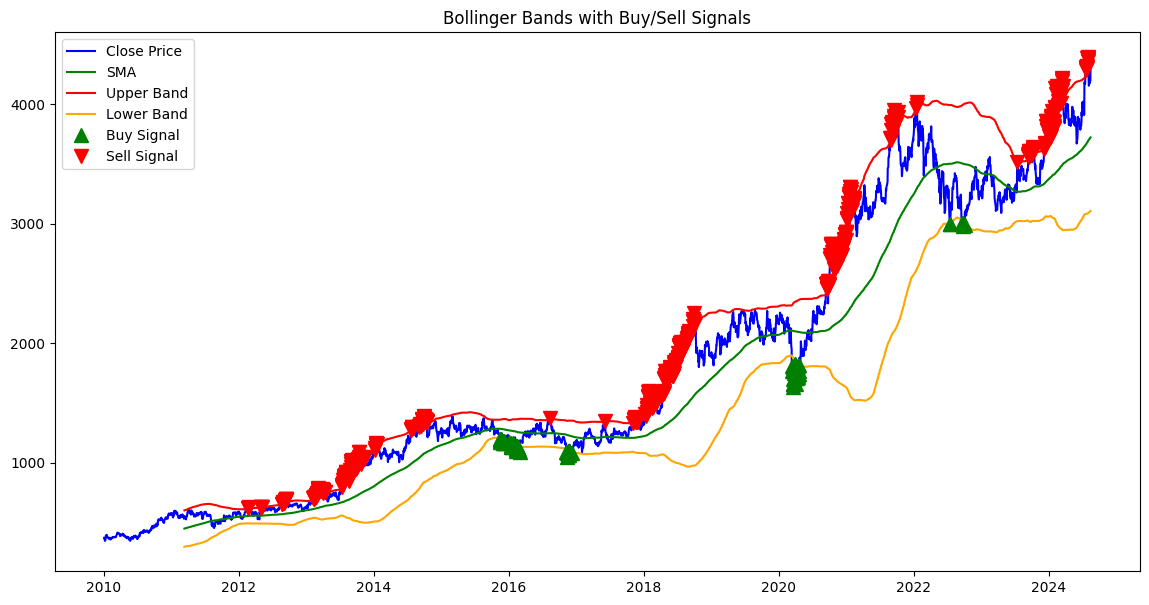

Total return: -3.35%


In [12]:
df=TCS.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 300
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

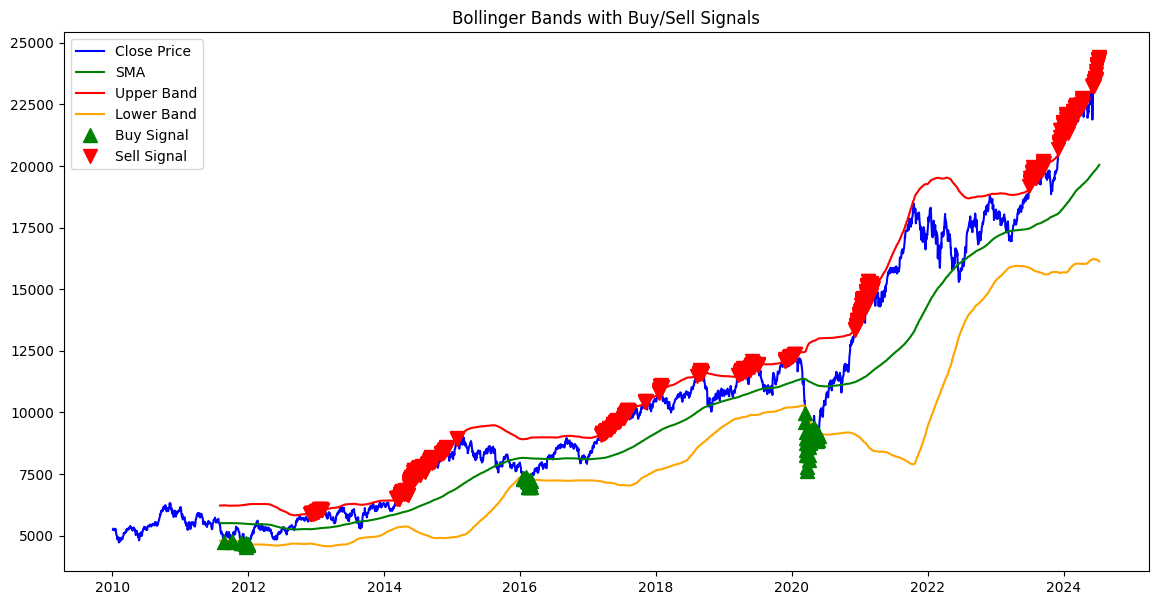

Total return: -3.10%


In [13]:
df=NIFTY50.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 400
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

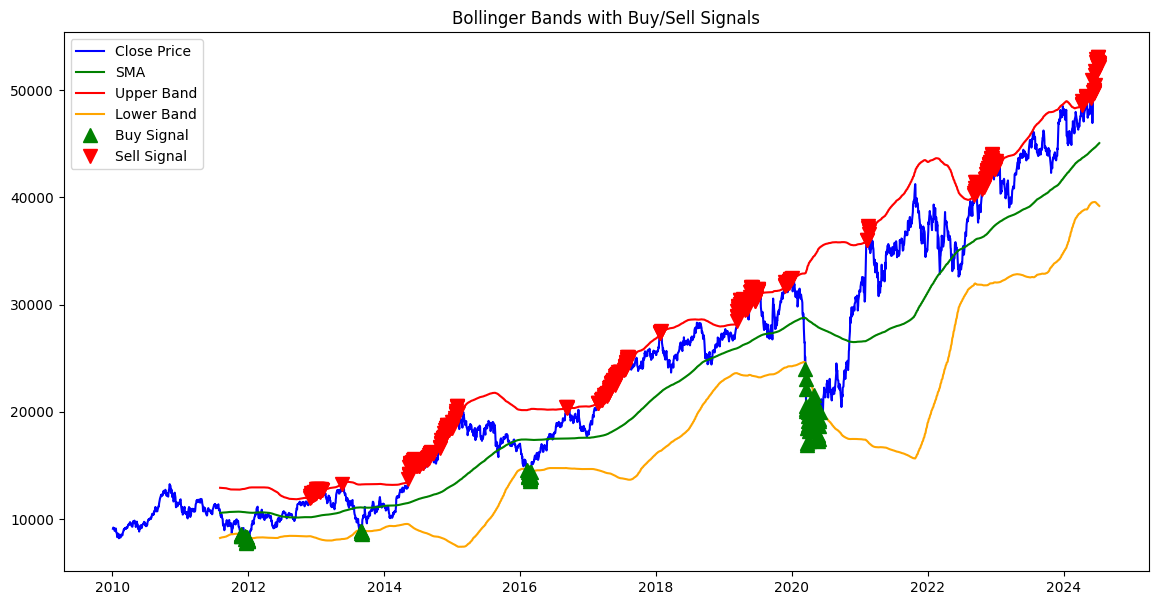

Total return: 9.70%


In [14]:
df=NIFTYBANK.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 400
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

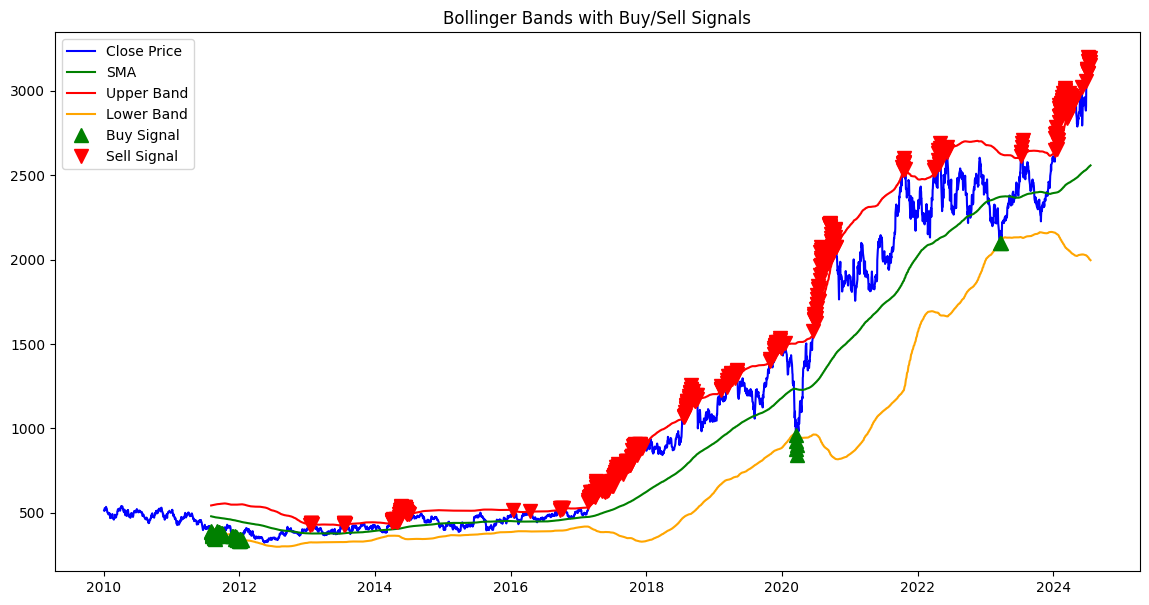

Total return: 13.94%


In [15]:
df=RELIANCE.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 400
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

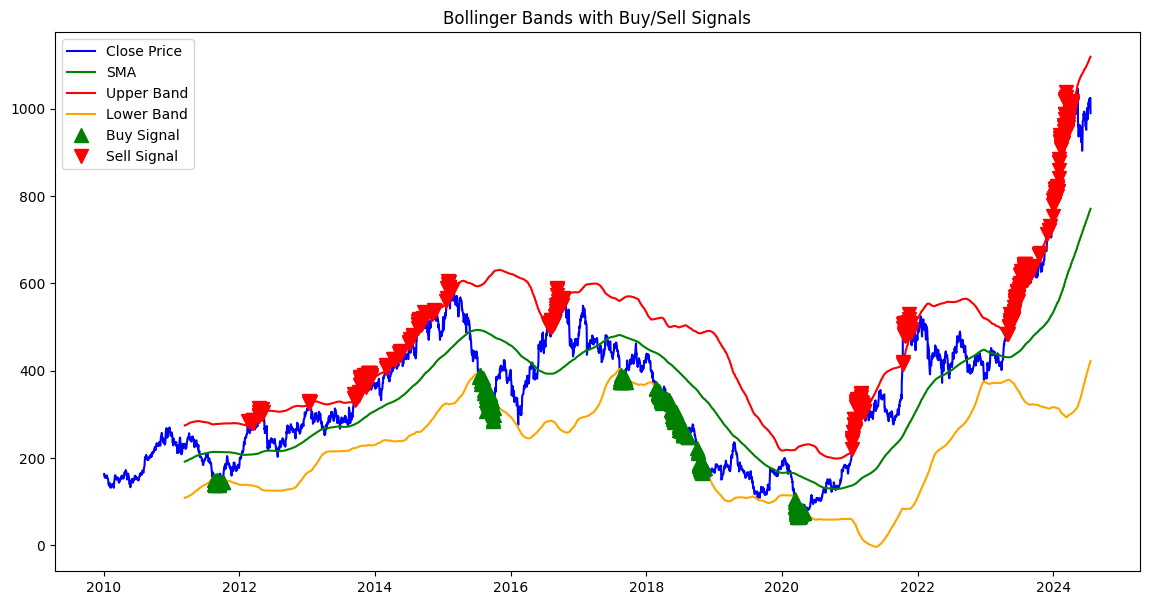

Total return: 2.34%


In [16]:
df=TATAMOTORS.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 300
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

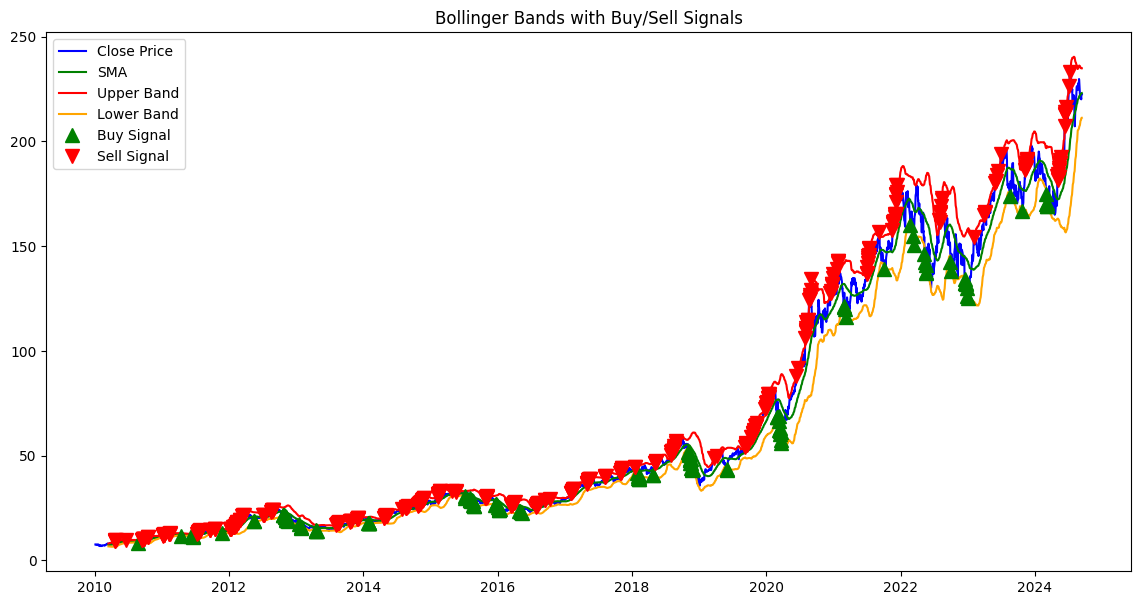

Total return: -15.69%


In [17]:
df=AAPL.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 50
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

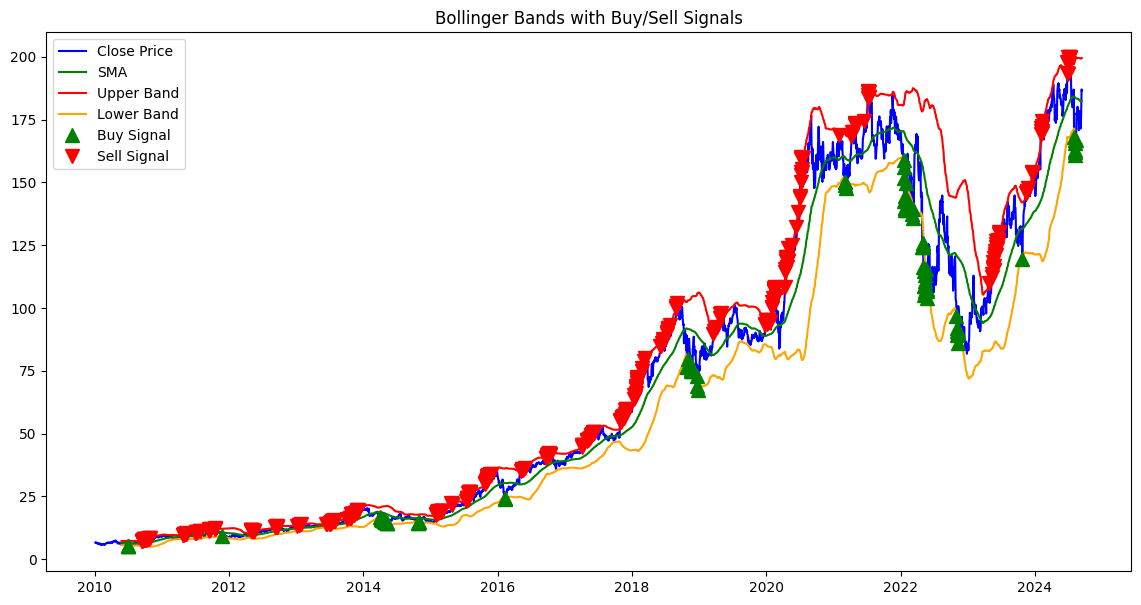

Total return: 103.52%


In [18]:
df=AMZN.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 100
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

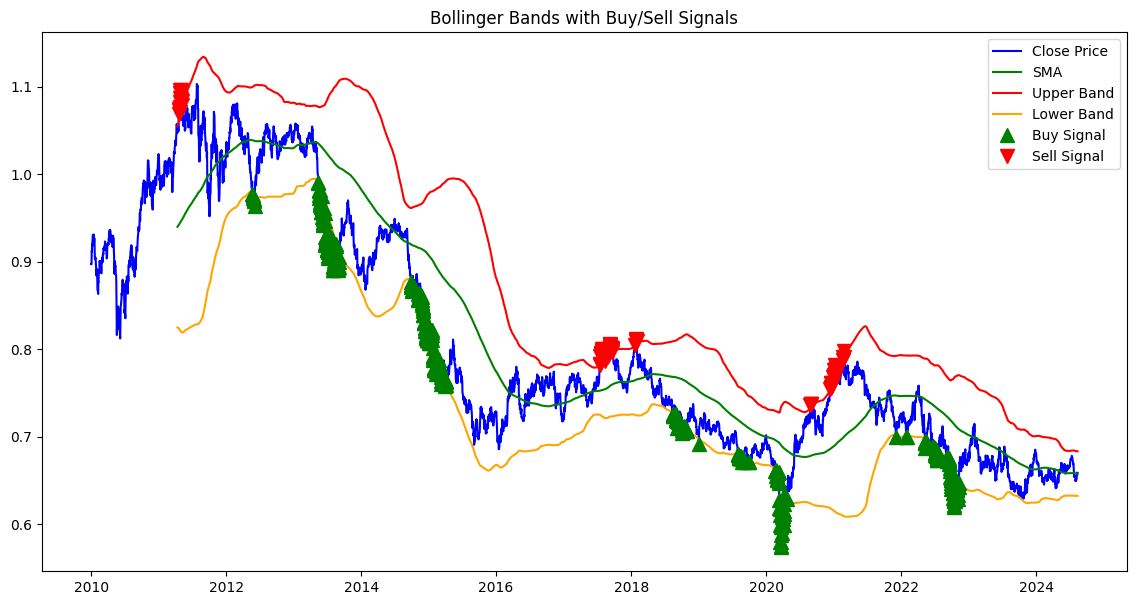

Total return: -1.19%


In [19]:
df=AUDUSD.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 400
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

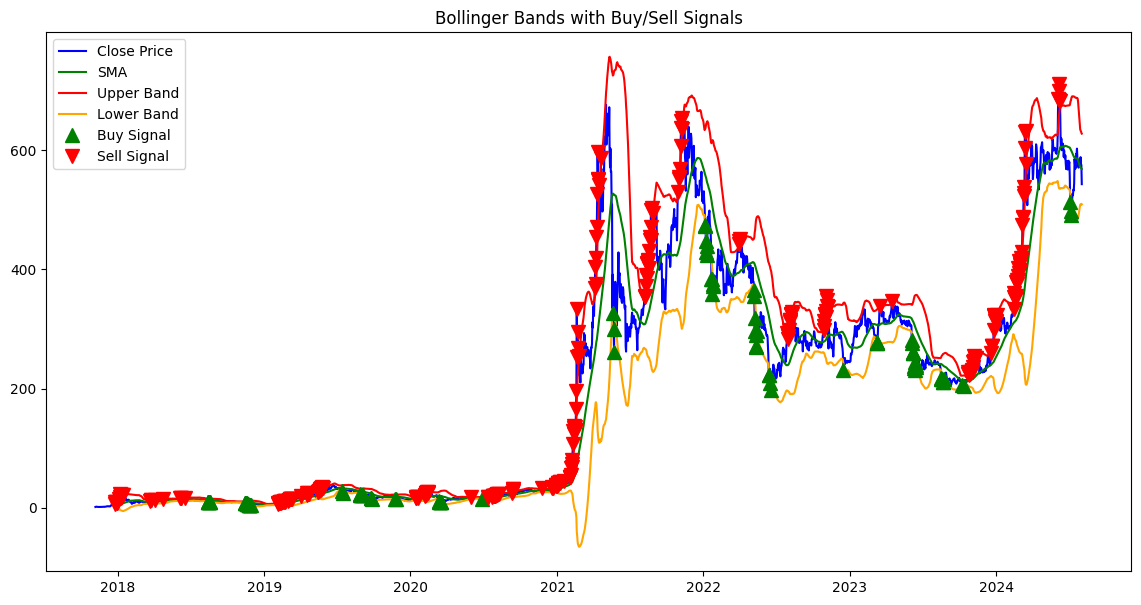

Total return: -98.98%


In [20]:
df=BNBUSDT.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 50
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

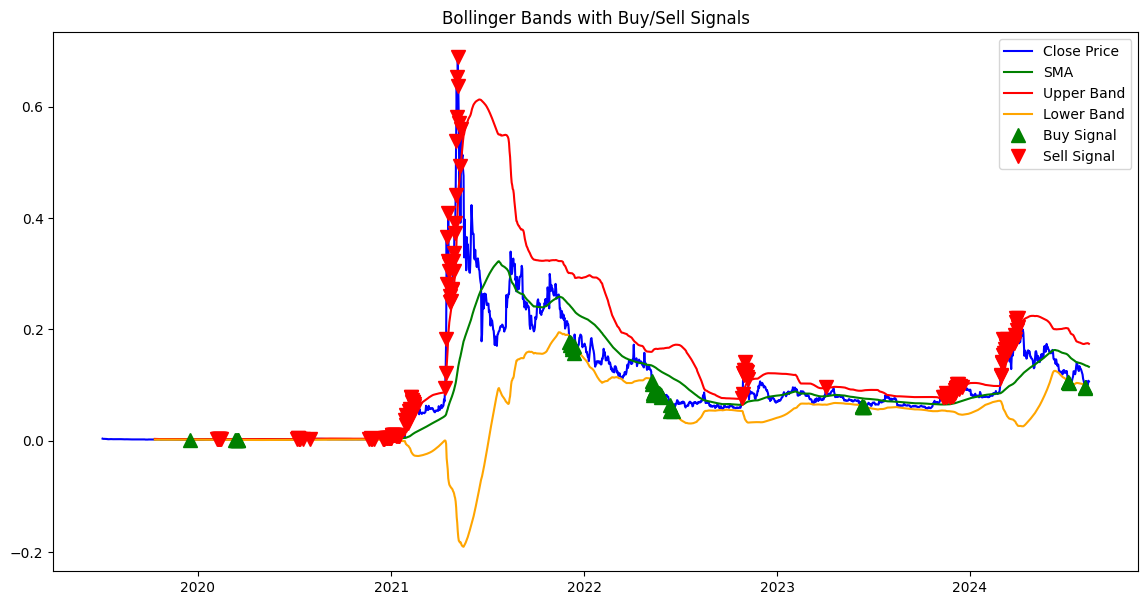

Total return: -100.00%


In [21]:
df=DOGEUSDT.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 100
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

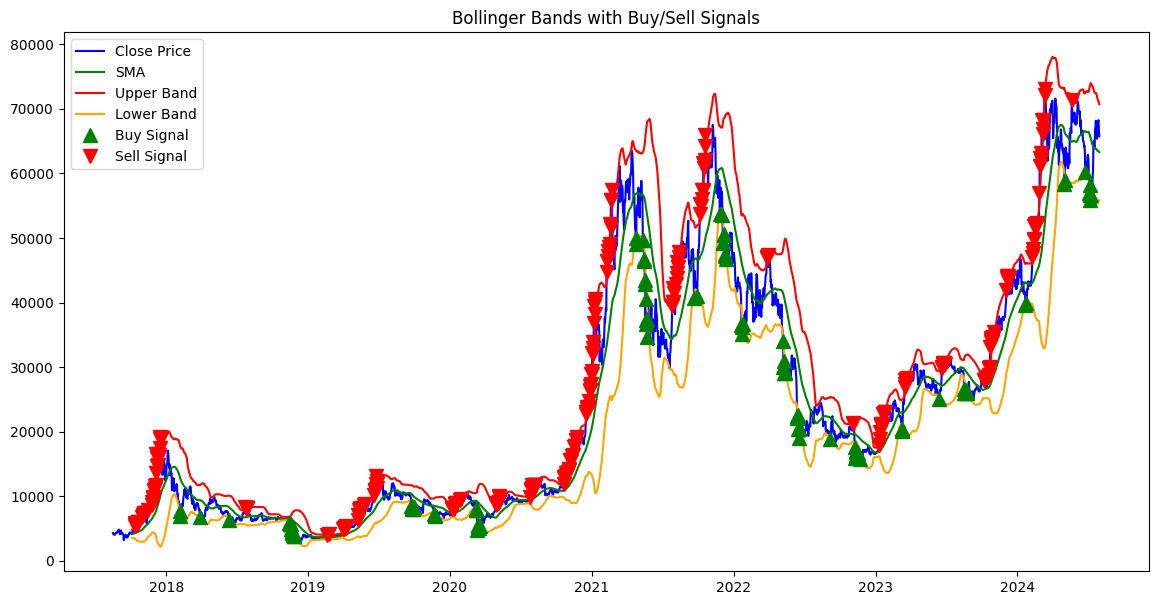

Total return: -94.24%


In [22]:
df=BTCUSDT.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 50
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

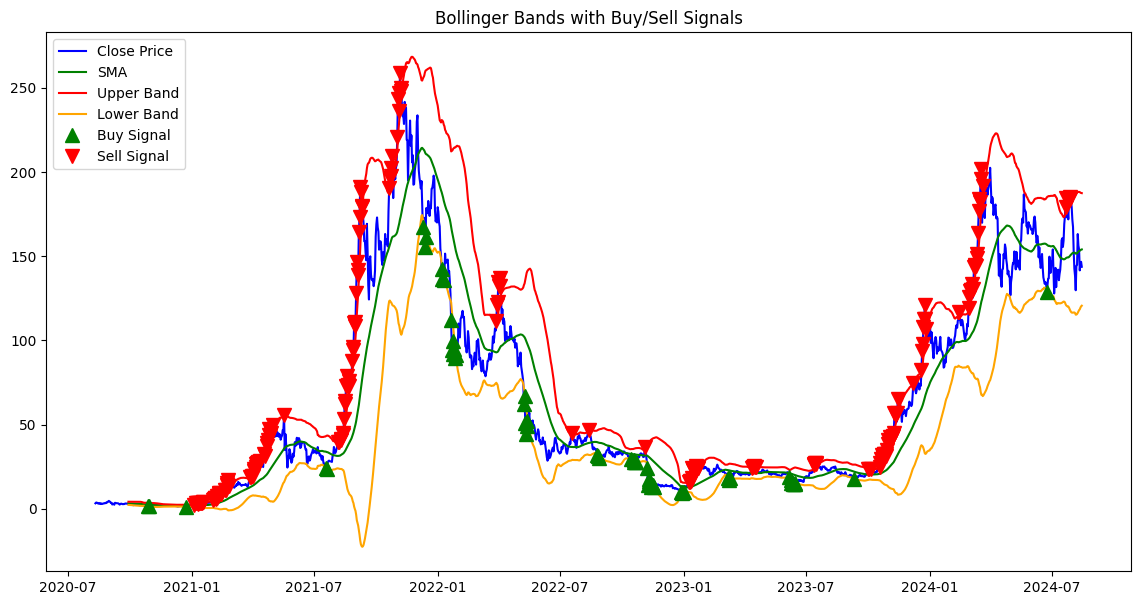

Total return: -96.75%


In [23]:
df=SOLUSDT.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 50
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

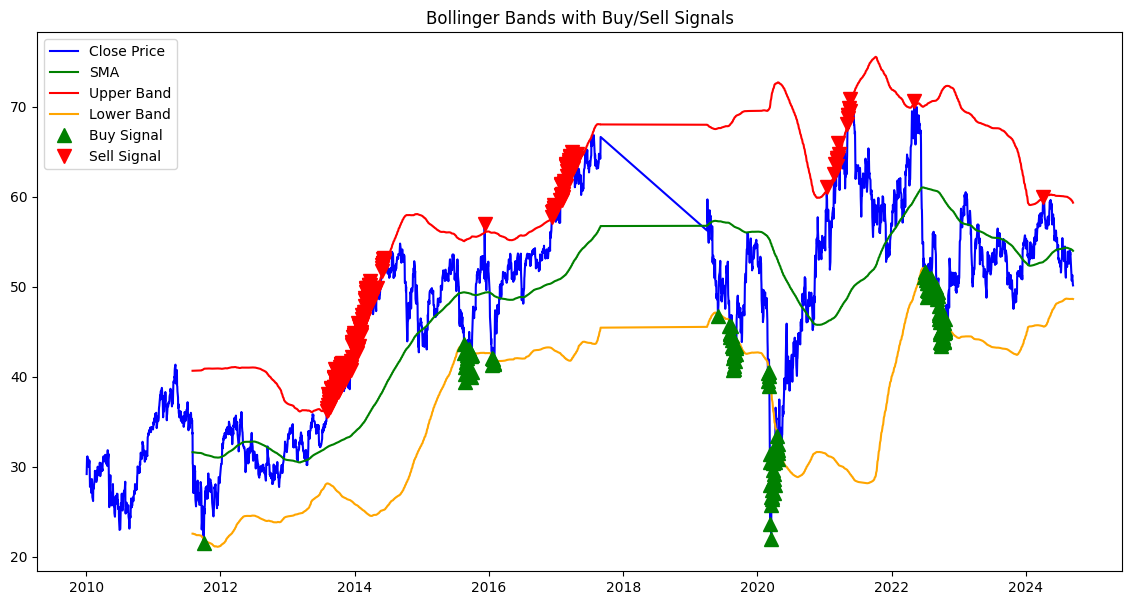

Total return: 47.01%


In [24]:
df=DOW.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 400
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

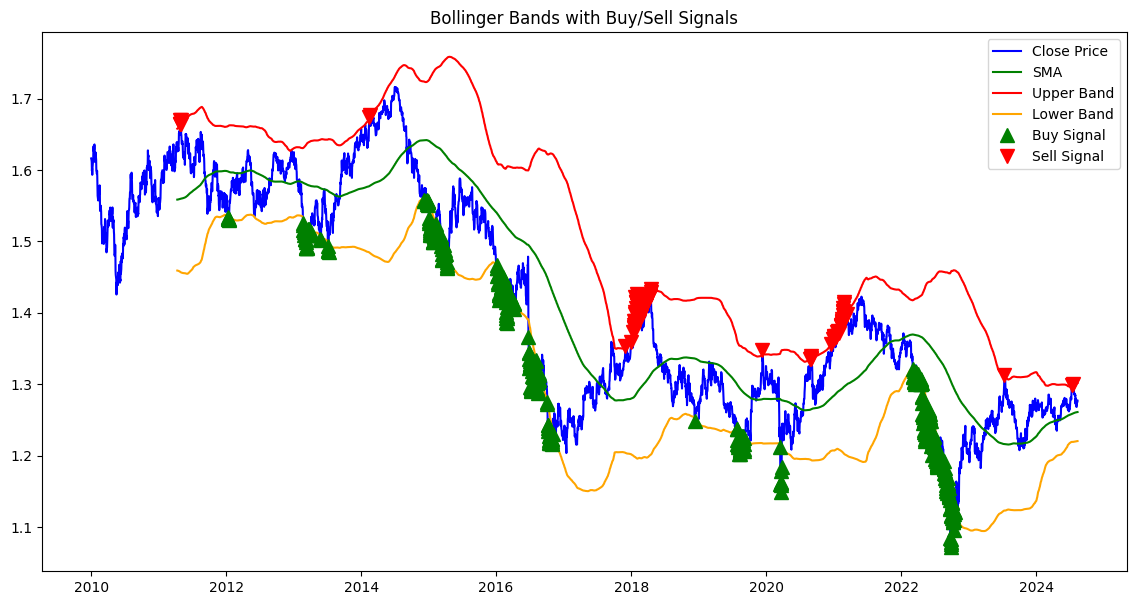

Total return: 8.85%


In [25]:
df=GBPUSD.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 400
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

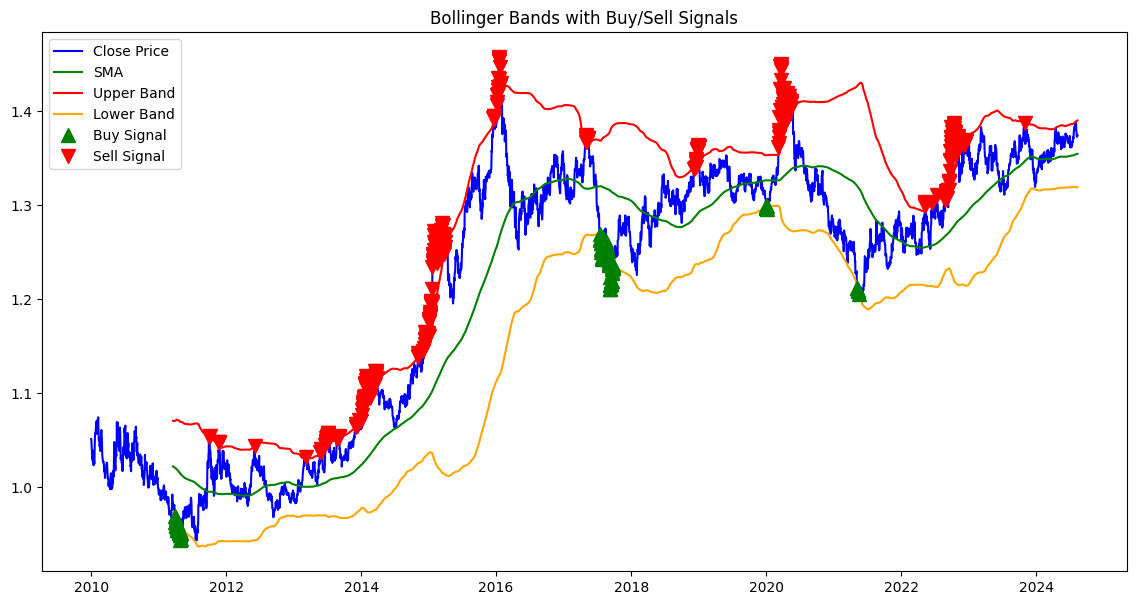

Total return: 2.94%


In [26]:
df=USDCAD.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 380
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

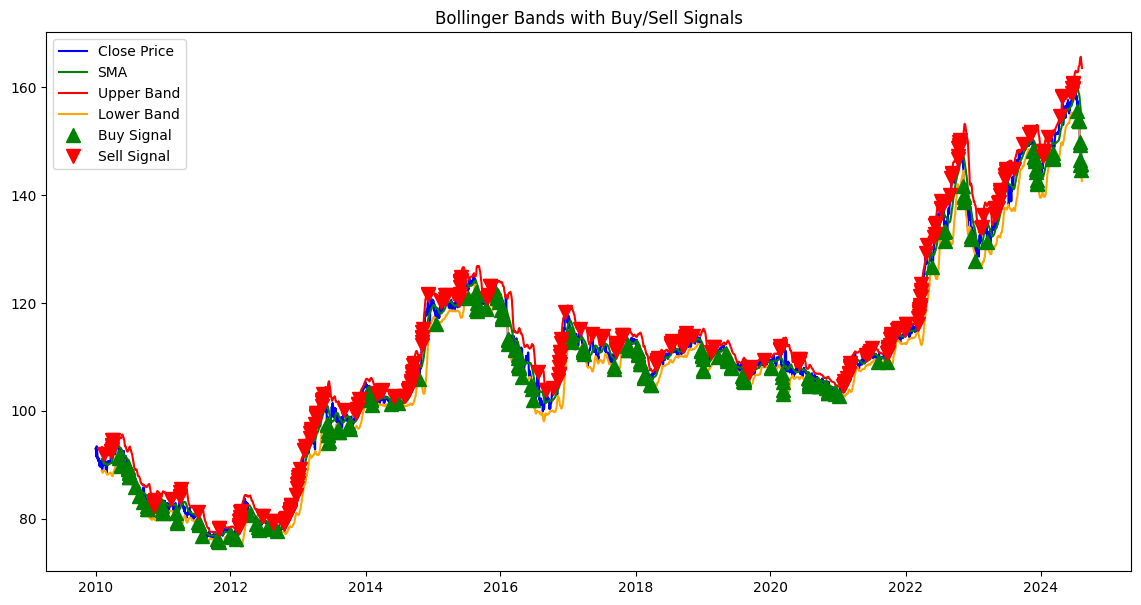

Total return: 1.56%


In [27]:
df=USDJPY.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 30
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

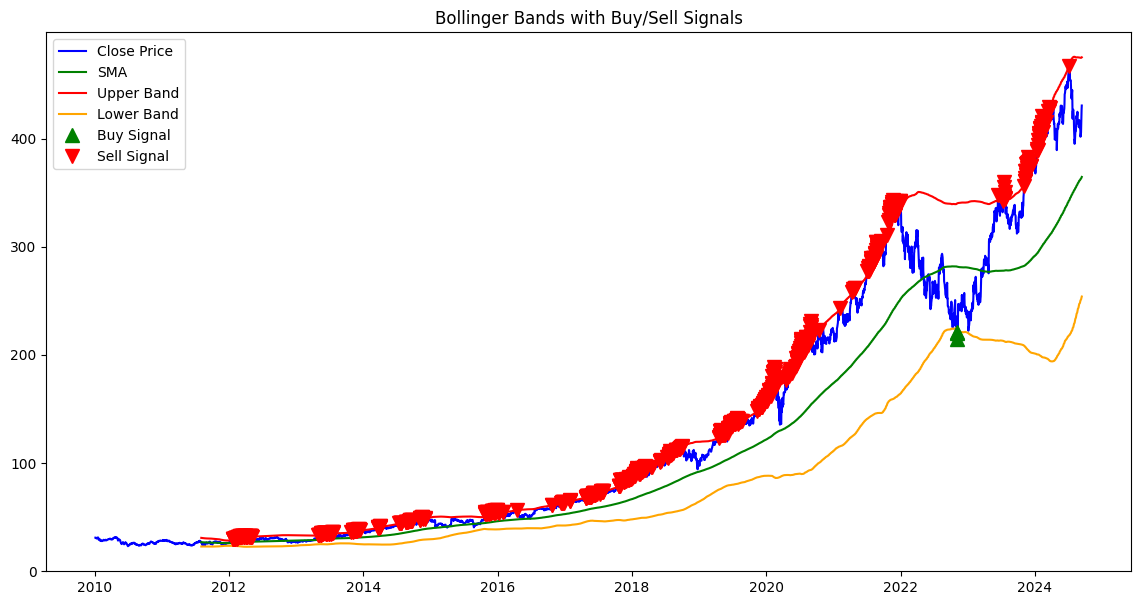

Total return: 30.64%


In [28]:
df=MSFT.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 400
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

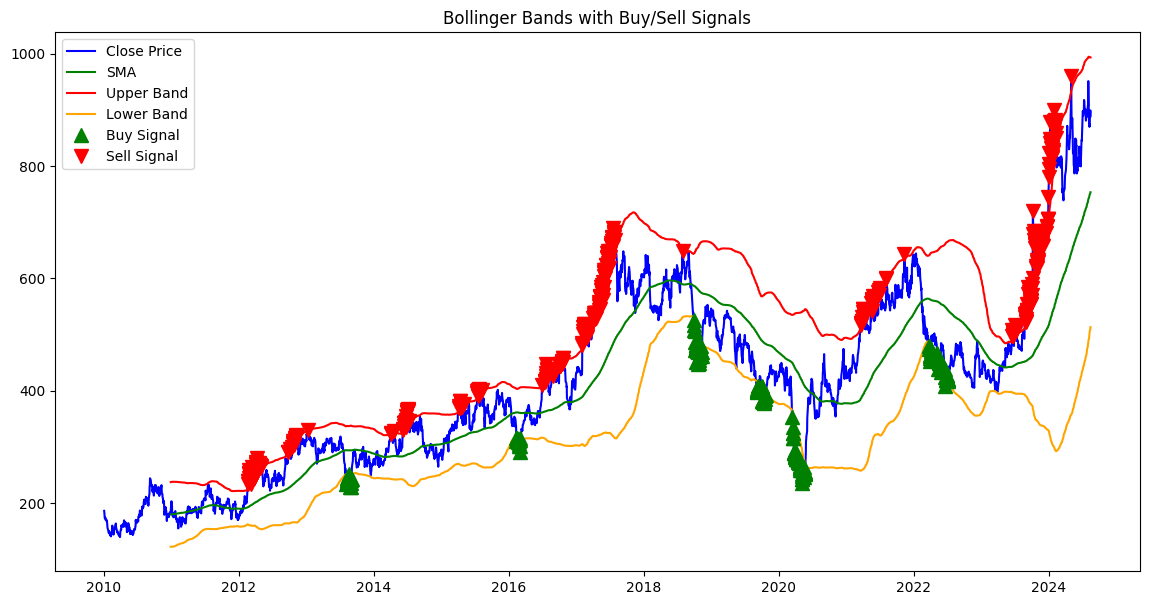

Total return: -7.42%


In [29]:
df=GODREJIND.copy()
df.rename(columns={'Close': 'close'}, inplace=True)
# Parameters
window = 250
num_std_dev = 2
risk_per_trade = 0.02
initial_capital = 10000
position_size_factor = 0.1


df['SMA'] = df['close'].rolling(window).mean()
df['StdDev'] = df['close'].rolling(window).std()
df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

#  Entry/Exit Rules
df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

# Combine signals to form positions
df['Position'] = 0
df.loc[df['Buy Signal'] == 1, 'Position'] = 1
df.loc[df['Sell Signal'] == -1, 'Position'] = -1
df['Position'] = df['Position'].shift()

# Calculate daily returns based on the position
df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

df['Position Size'] = np.minimum(position_size_factor * initial_capital, risk_per_trade * initial_capital)


stop_loss_pct = 0.02  #2%
take_profit_pct = 0.04   #4%
df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

df['Exit Signal'] = 0
df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])


df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', color='blue')

plt.plot(df.index, df['SMA'], label='SMA', color='green')
plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()

cumulative_return = (1 + df['Daily Return'].fillna(0)).cumprod() - 1
total_return = cumulative_return.iloc[-1]
total.append(total_return)
print(f"Total return: {total_return * 100:.2f}%")

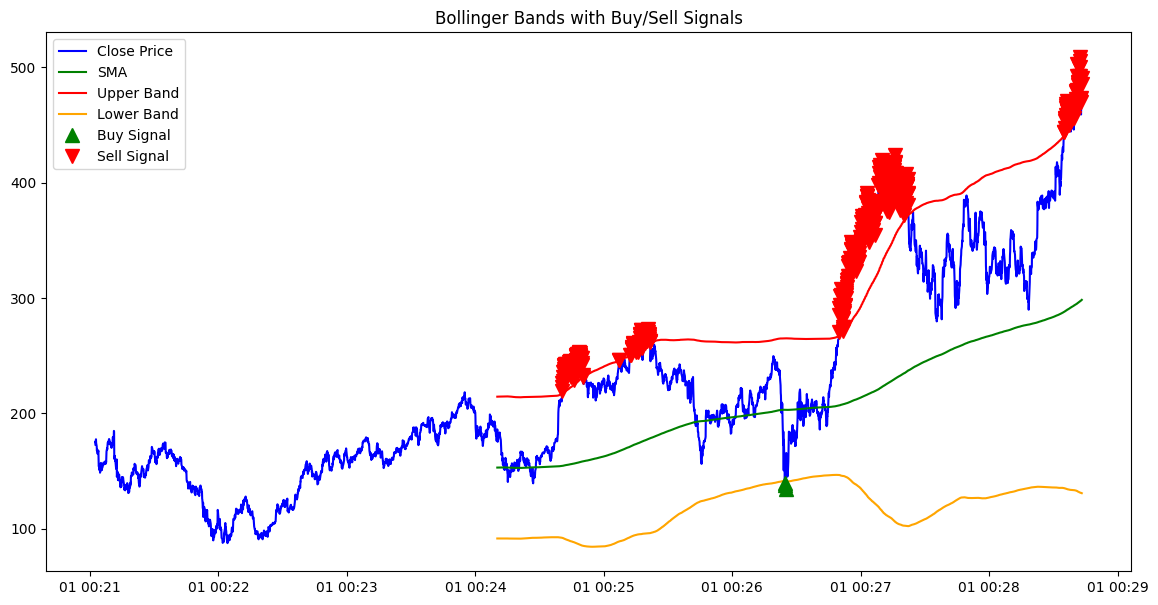

Sharpe Ratio: -0.20
Sortino Ratio: -0.30
Max Drawdown: 38.84%
Annualized Return: 0.00%
Cumulative Return: 80.84%


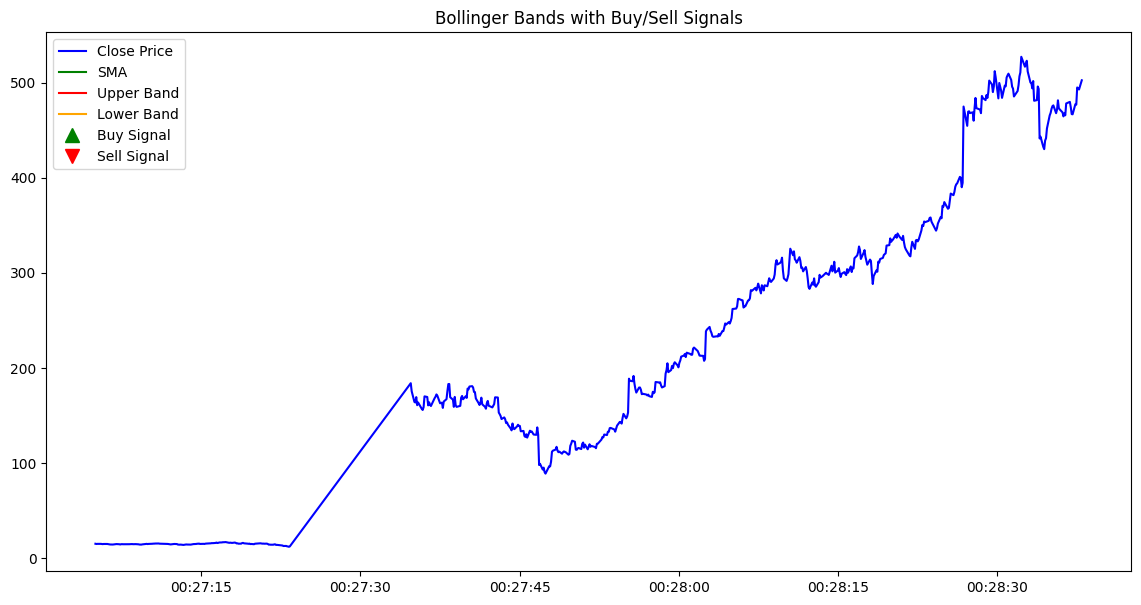

<ipython-input-30-e81d9d204b8d>:49: RuntimeWarning: divide by zero encountered in scalar divide
  sharpe_ratio = np.sqrt(252) * (excess_return.mean() / excess_return.std())
<ipython-input-30-e81d9d204b8d>:52: RuntimeWarning: divide by zero encountered in scalar divide
  sortino_ratio = np.sqrt(252) * (excess_return.mean() / downside_return.std())


Sharpe Ratio: -inf
Sortino Ratio: -inf
Max Drawdown: 0.00%
Annualized Return: 0.00%
Cumulative Return: 100.00%


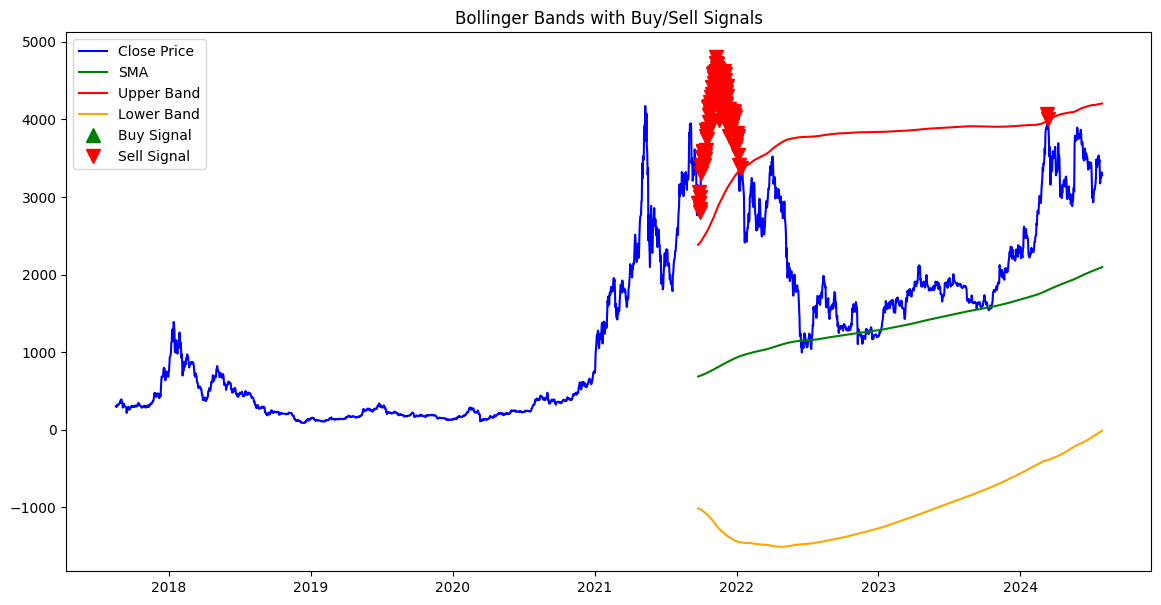

Sharpe Ratio: -0.19
Sortino Ratio: -0.26
Max Drawdown: 45.34%
Annualized Return: -3.03%
Cumulative Return: 80.71%


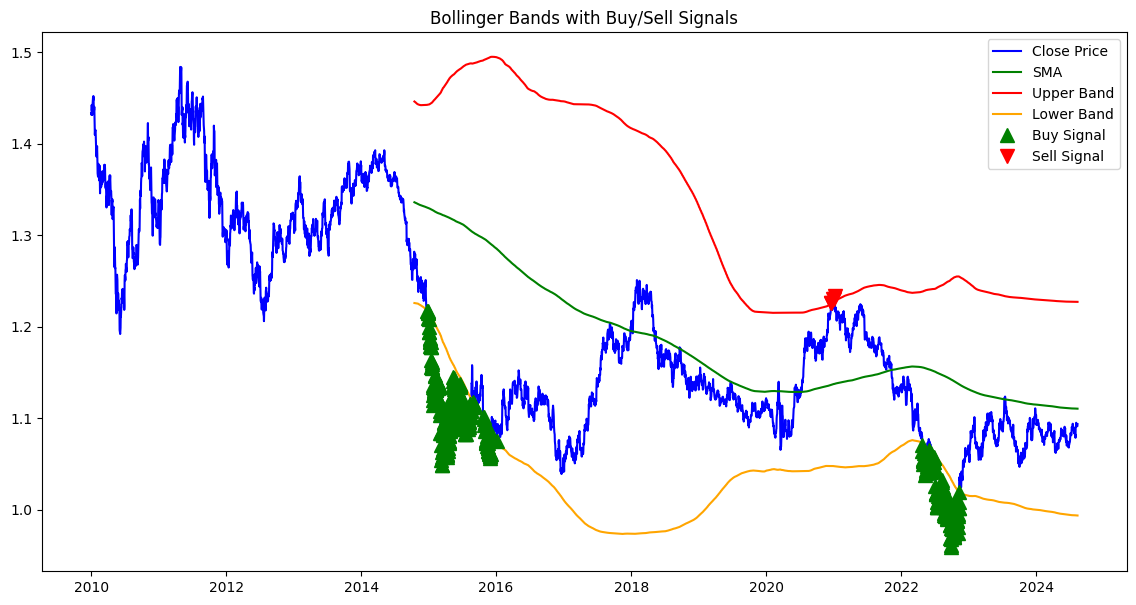

Sharpe Ratio: -0.42
Sortino Ratio: -0.60
Max Drawdown: 14.01%
Annualized Return: -0.52%
Cumulative Return: 92.68%


<ipython-input-30-e81d9d204b8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Close': 'close'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'High': 'high'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Low': 'low'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:15: SettingWit

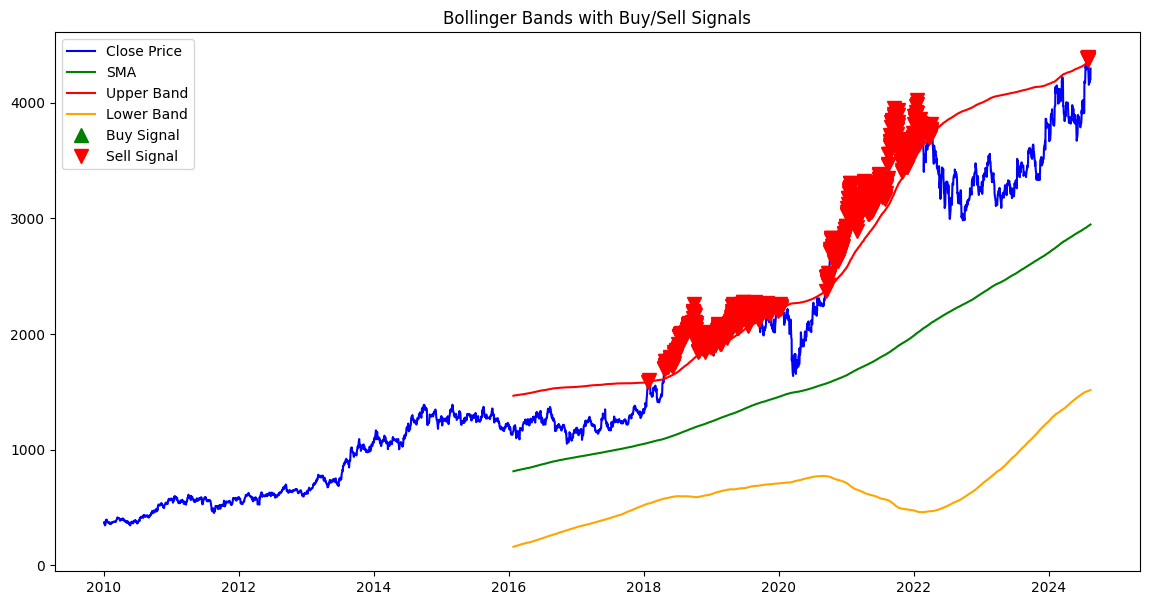

Sharpe Ratio: -0.34
Sortino Ratio: -0.46
Max Drawdown: 45.61%
Annualized Return: -2.89%
Cumulative Return: 65.10%


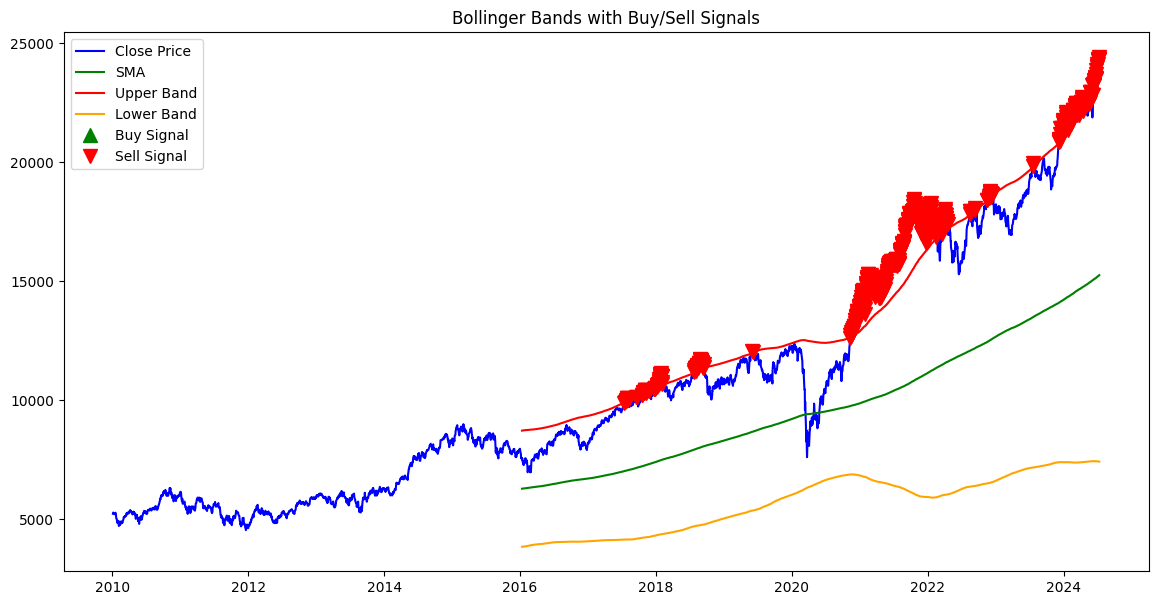

Sharpe Ratio: -0.55
Sortino Ratio: -0.78
Max Drawdown: 32.84%
Annualized Return: -2.35%
Cumulative Return: 70.82%


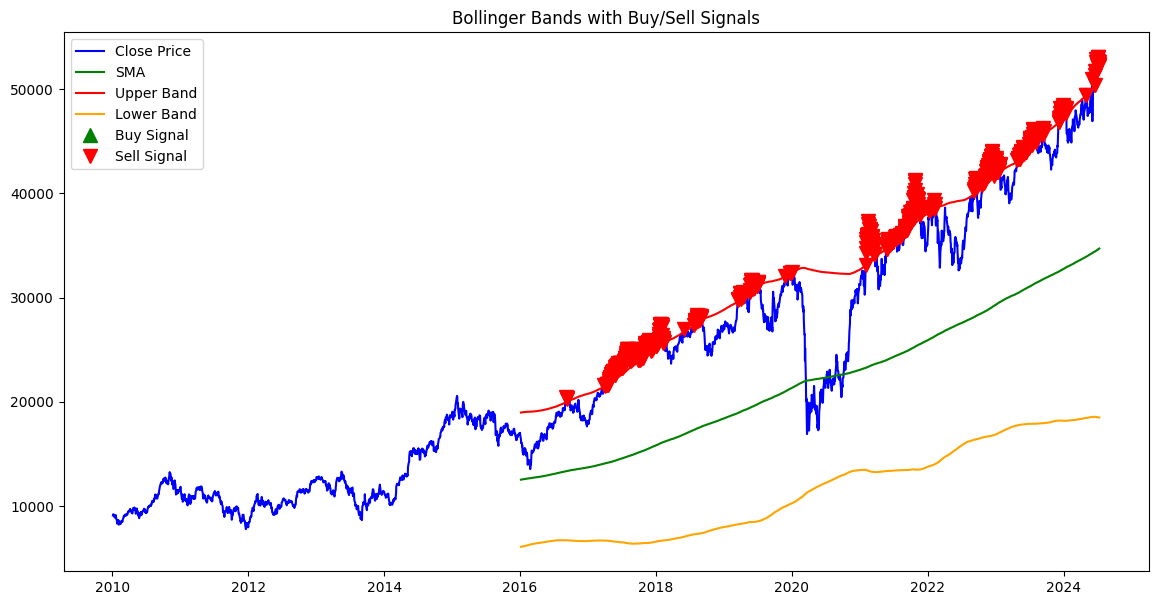

Sharpe Ratio: -0.03
Sortino Ratio: -0.04
Max Drawdown: 18.50%
Annualized Return: 0.62%
Cumulative Return: 109.35%


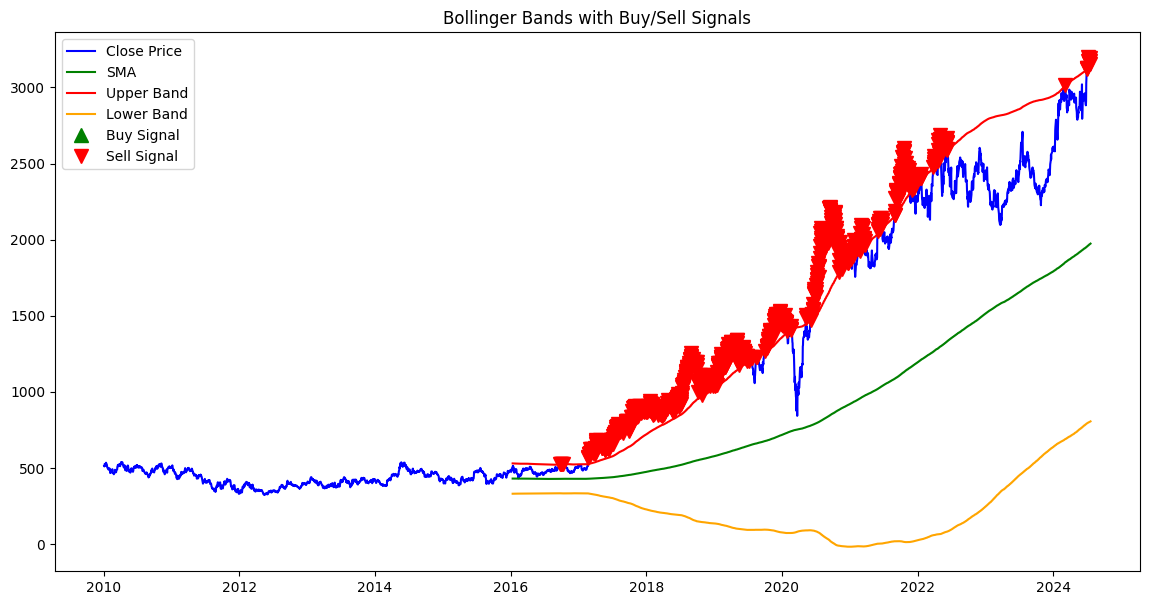

Sharpe Ratio: -0.44
Sortino Ratio: -0.58
Max Drawdown: 73.77%
Annualized Return: -5.76%
Cumulative Return: 42.21%


<ipython-input-30-e81d9d204b8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Close': 'close'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'High': 'high'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Low': 'low'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:15: SettingWit

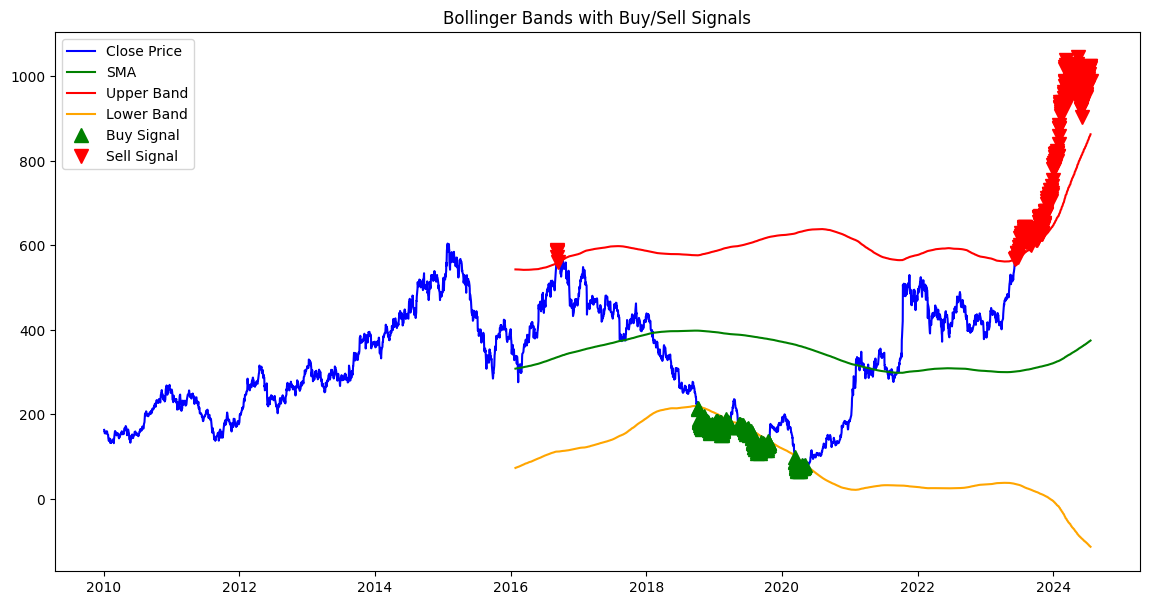

Sharpe Ratio: -0.19
Sortino Ratio: -0.27
Max Drawdown: 53.13%
Annualized Return: -3.97%
Cumulative Return: 55.48%


<ipython-input-30-e81d9d204b8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Close': 'close'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'High': 'high'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Low': 'low'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:15: SettingWit

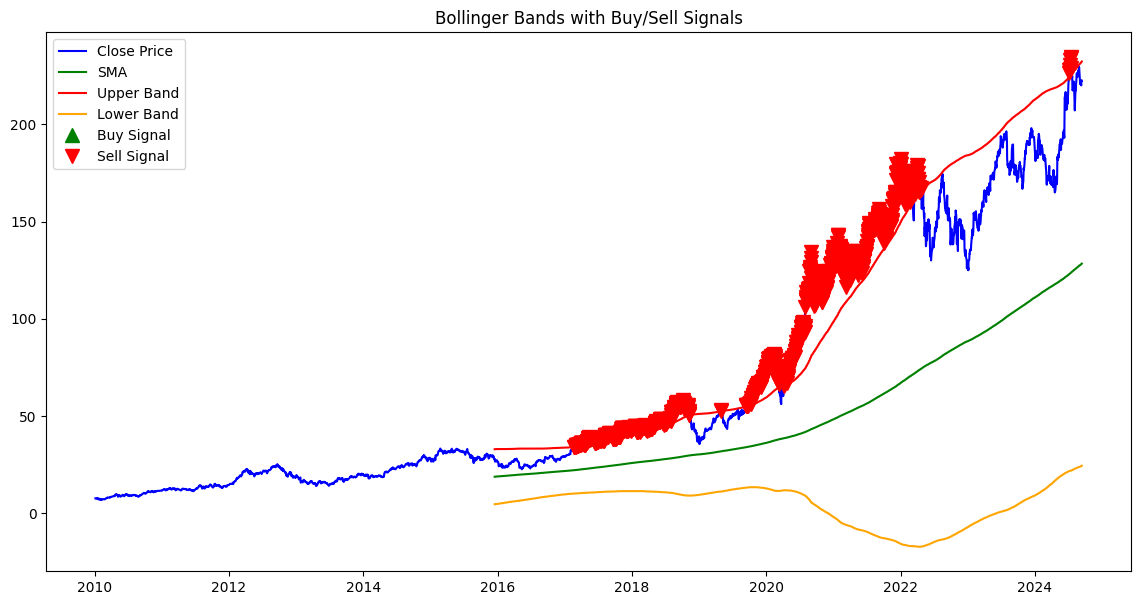

Sharpe Ratio: -0.68
Sortino Ratio: -0.89
Max Drawdown: 82.07%
Annualized Return: -10.04%
Cumulative Return: 21.13%


<ipython-input-30-e81d9d204b8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Close': 'close'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'High': 'high'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Low': 'low'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:15: SettingWit

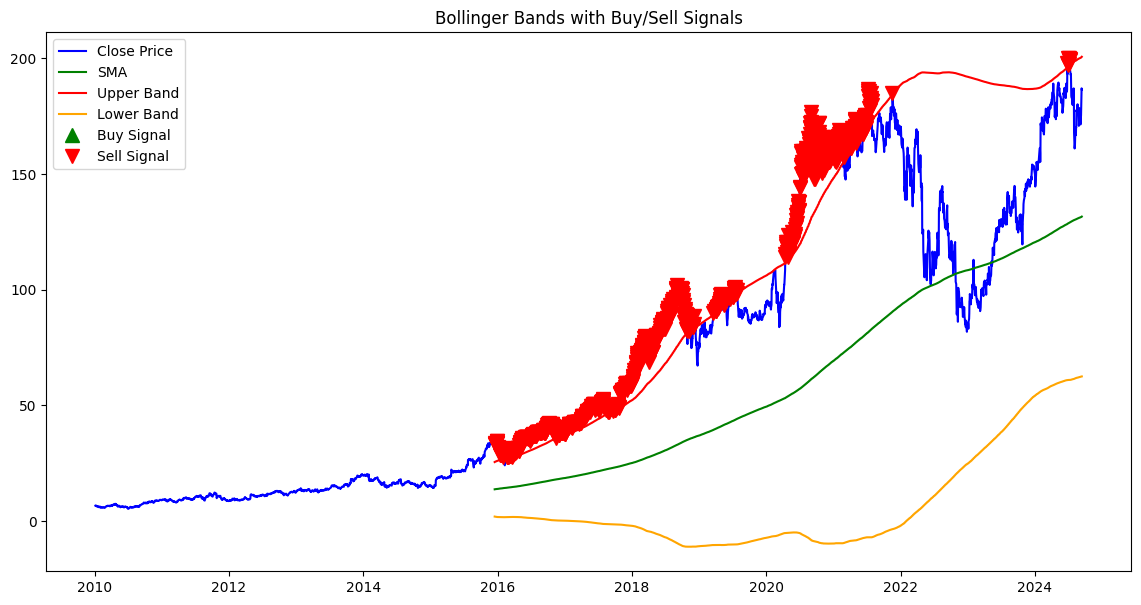

Sharpe Ratio: -0.50
Sortino Ratio: -0.69
Max Drawdown: 76.41%
Annualized Return: -7.30%
Cumulative Return: 32.81%


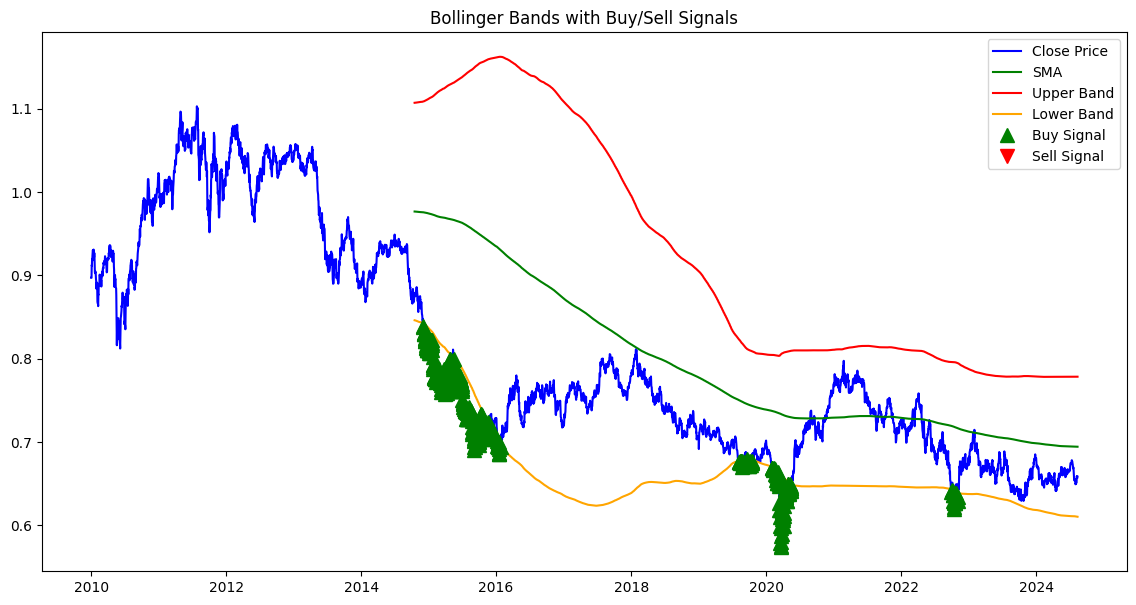

Sharpe Ratio: -0.34
Sortino Ratio: -0.47
Max Drawdown: 22.29%
Annualized Return: -0.42%
Cumulative Return: 94.04%


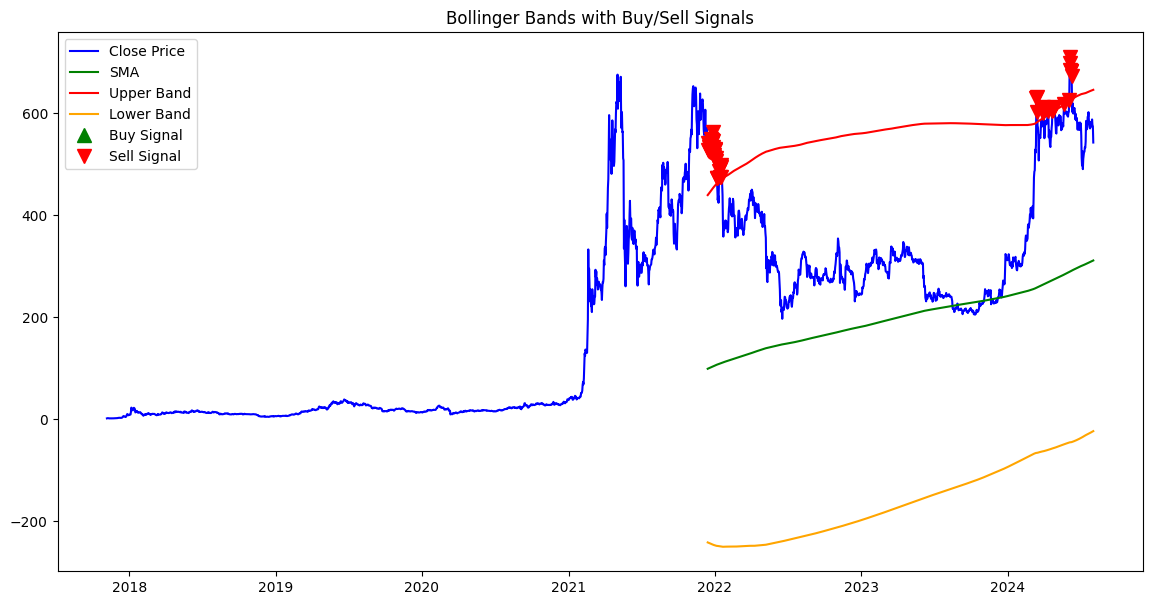

Sharpe Ratio: 0.72
Sortino Ratio: 1.84
Max Drawdown: 7.25%
Annualized Return: 9.01%
Cumulative Return: 178.91%


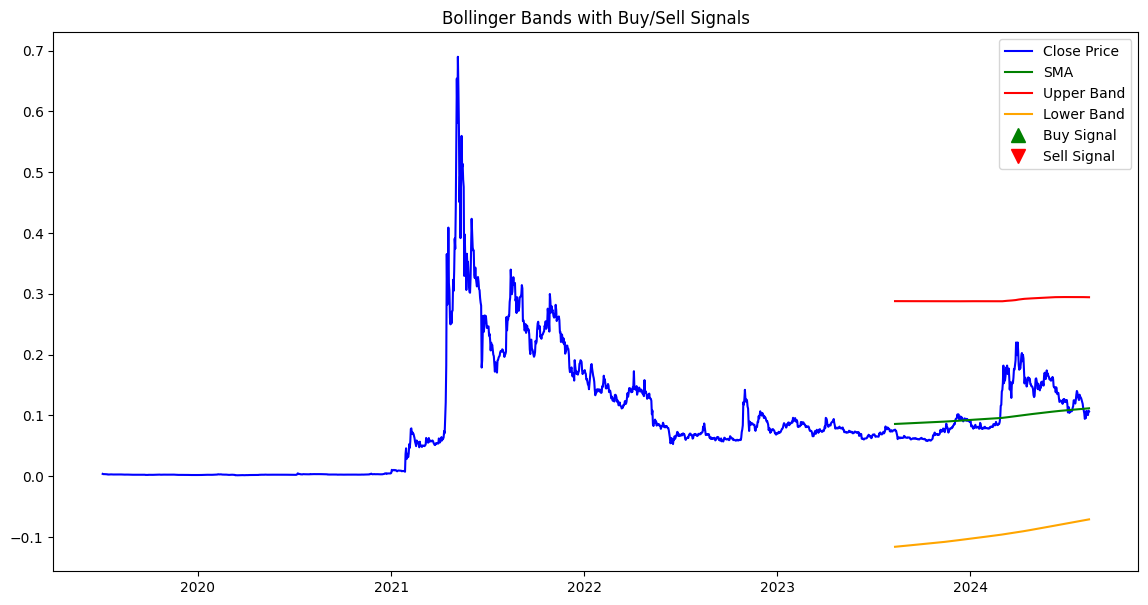

Sharpe Ratio: -92937925675662160.00
Sortino Ratio: -92937925675662160.00
Max Drawdown: 0.00%
Annualized Return: 0.00%
Cumulative Return: 100.00%


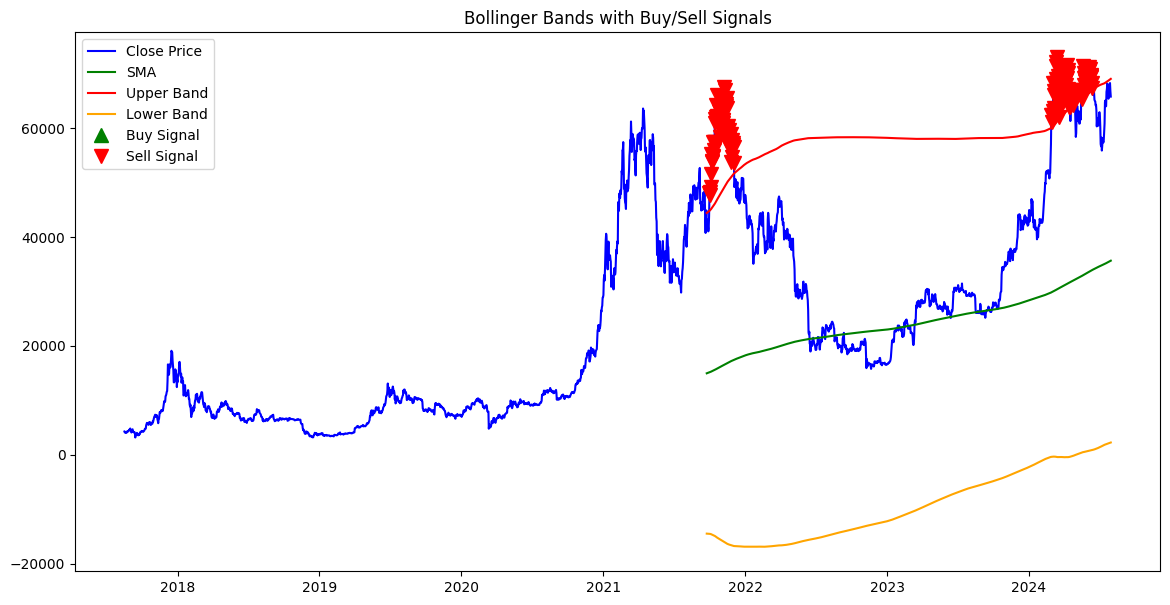

Sharpe Ratio: -0.24
Sortino Ratio: -0.33
Max Drawdown: 32.30%
Annualized Return: -3.80%
Cumulative Return: 76.39%


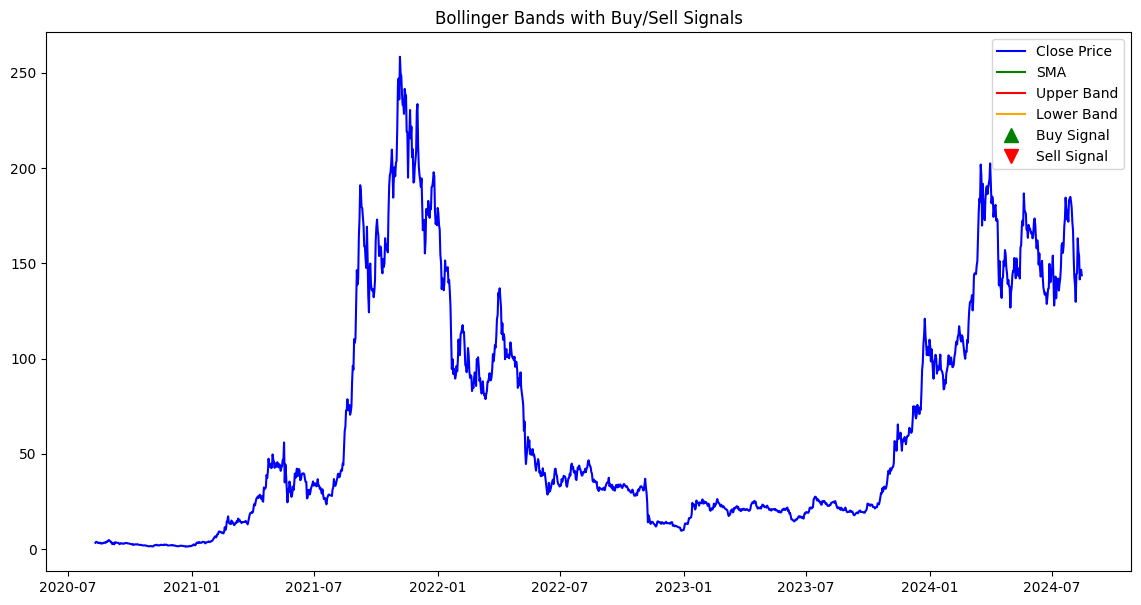

Sharpe Ratio: -92931075293433600.00
Sortino Ratio: -92931075293433600.00
Max Drawdown: 0.00%
Annualized Return: 0.00%
Cumulative Return: 100.00%


<ipython-input-30-e81d9d204b8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Close': 'close'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'High': 'high'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Low': 'low'}, inplace=True)
<ipython-input-30-e81d9d204b8d>:15: SettingWit

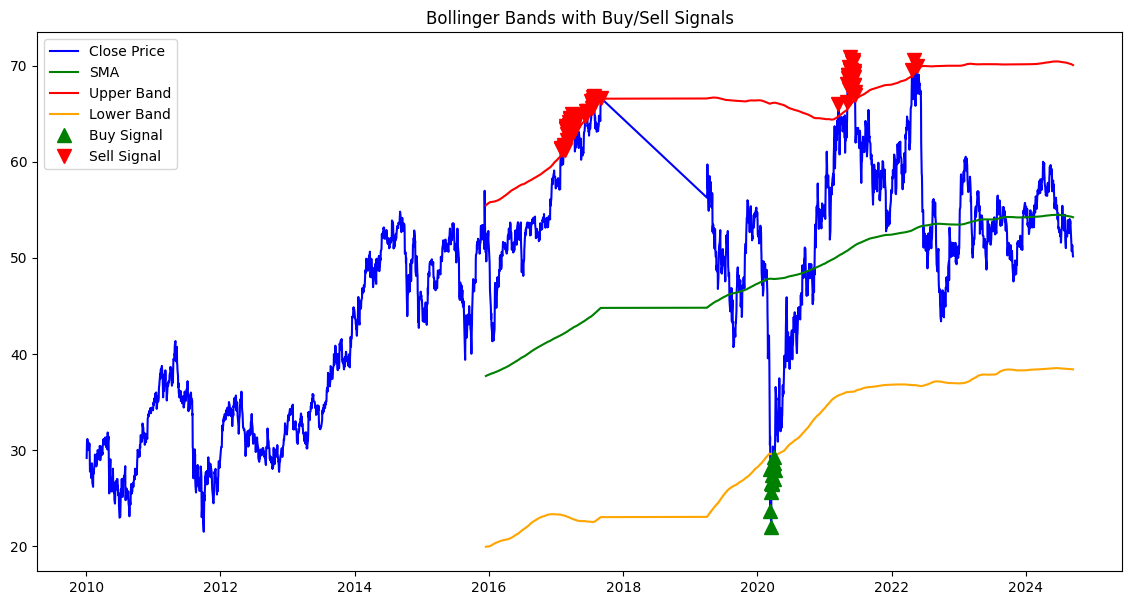

Sharpe Ratio: 0.29
Sortino Ratio: 0.53
Max Drawdown: 14.36%
Annualized Return: 3.01%
Cumulative Return: 154.56%


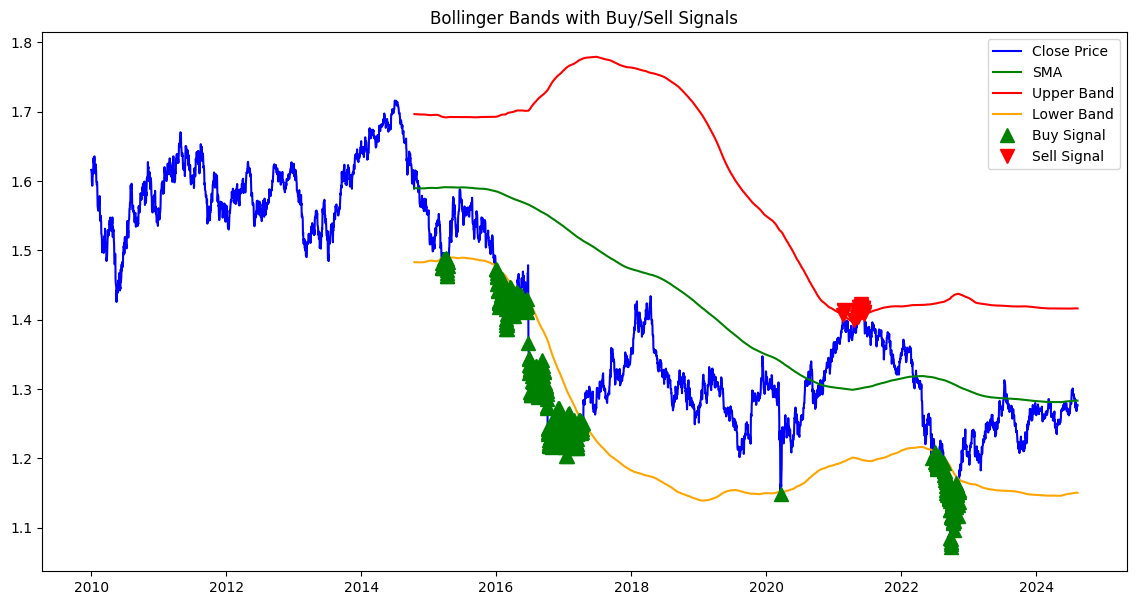

Sharpe Ratio: -0.32
Sortino Ratio: -0.46
Max Drawdown: 14.09%
Annualized Return: -0.29%
Cumulative Return: 95.79%


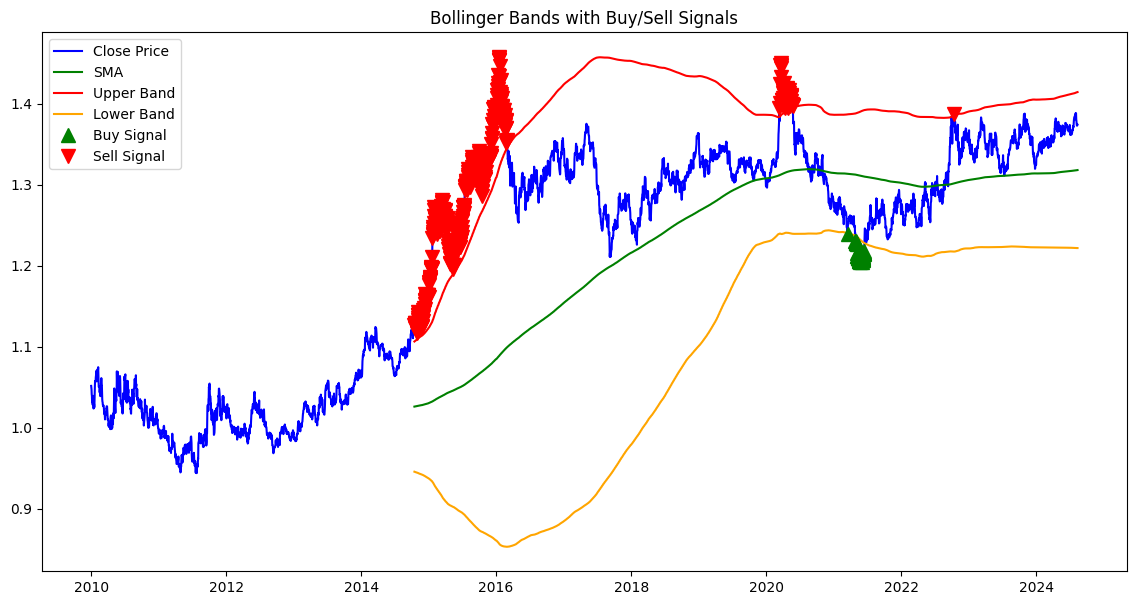

Sharpe Ratio: -0.60
Sortino Ratio: -0.85
Max Drawdown: 24.09%
Annualized Return: -0.89%
Cumulative Return: 87.72%


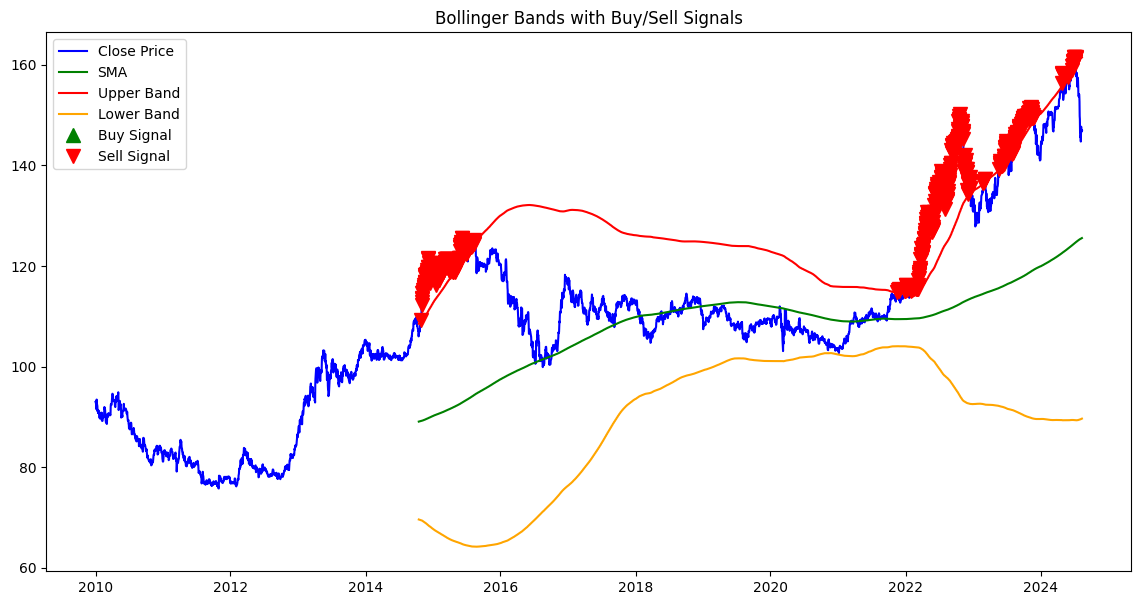

Sharpe Ratio: -0.57
Sortino Ratio: -0.83
Max Drawdown: 29.09%
Annualized Return: -1.35%
Cumulative Return: 81.96%


In [30]:
for df in [GS, META, ETHUSDT, EURUSD, TCS, NIFTY50, NIFTYBANK, RELIANCE, TATAMOTORS, AAPL, AMZN, AUDUSD, BNBUSDT, DOGEUSDT, BTCUSDT, SOLUSDT, DOW, GBPUSD, USDCAD, USDJPY]:

  df.rename(columns={'Close': 'close'}, inplace=True)
  df.rename(columns={'High': 'high'}, inplace=True)
  df.rename(columns={'Low': 'low'}, inplace=True)

  window = 1500
  num_std_dev = 2
  risk_per_trade = 0.02
  initial_capital = 10000
  position_size_factor = 0.1
  transaction_cost = 0.001
  slippage = 0.0005

  df['SMA'] = df['close'].rolling(window).mean()
  df['StdDev'] = df['close'].rolling(window).std()
  df['Upper Band'] = df['SMA'] + (num_std_dev * df['StdDev'])
  df['Lower Band'] = df['SMA'] - (num_std_dev * df['StdDev'])

  df['Buy Signal'] = np.where(df['close'] < df['Lower Band'], 1, 0)
  df['Sell Signal'] = np.where(df['close'] > df['Upper Band'], -1, 0)

  df['Position'] = 0
  df.loc[df['Buy Signal'] == 1, 'Position'] = 1
  df.loc[df['Sell Signal'] == -1, 'Position'] = -1
  df['Position'] = df['Position'].shift()

  df['Daily Return'] = df['close'].pct_change() * df['Position'].shift()

  df['Transaction Cost'] = np.abs(df['Position'].diff()) * transaction_cost
  df['Slippage'] = np.abs(df['Position'].diff()) * slippage
  df['Net Return'] = df['Daily Return'] - df['Transaction Cost'] - df['Slippage']

  df['Cumulative Return'] = (1 + df['Net Return'].fillna(0)).cumprod()

  stop_loss_pct = 0.02
  take_profit_pct = 0.04
  df['Stop Loss'] = np.where(df['Position'] == 1, df['close'] * (1 - stop_loss_pct), np.nan)
  df['Take Profit'] = np.where(df['Position'] == 1, df['close'] * (1 + take_profit_pct), np.nan)

  df['Exit Signal'] = 0
  df['Exit Signal'] = np.where(df['close'] <= df['Stop Loss'], -1, df['Exit Signal'])
  df['Exit Signal'] = np.where(df['close'] >= df['Take Profit'], 1, df['Exit Signal'])

  df['Position'] = np.where(df['Exit Signal'] != 0, 0, df['Position'])

  def calculate_performance(df, risk_free_rate=0.01):
      excess_return = df['Net Return'] - risk_free_rate / 252
      sharpe_ratio = np.sqrt(252) * (excess_return.mean() / excess_return.std())

      downside_return = excess_return[excess_return < 0]
      sortino_ratio = np.sqrt(252) * (excess_return.mean() / downside_return.std())

      cumulative_return = (1 + df['Net Return'].fillna(0)).cumprod()
      running_max = cumulative_return.cummax()
      drawdown = (running_max - cumulative_return) / running_max
      max_drawdown = drawdown.max()

      total_days = (df.index[-1] - df.index[0]).days
      if total_days == 0:
        cagr = 0
      else:
        cagr = (df['Cumulative Return'].iloc[-1]) ** (365.0 / total_days) - 1

      total_return = df['Cumulative Return'].iloc[-1]

      return sharpe_ratio, sortino_ratio, max_drawdown, cagr, total_return

  plt.figure(figsize=(14, 7))
  plt.plot(df.index, df['close'], label='Close Price', color='blue')
  plt.plot(df.index, df['SMA'], label='SMA', color='green')
  plt.plot(df.index, df['Upper Band'], label='Upper Band', color='red')
  plt.plot(df.index, df['Lower Band'], label='Lower Band', color='orange')

  plt.plot(df[df['Buy Signal'] == 1].index, df['close'][df['Buy Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
  plt.plot(df[df['Sell Signal'] == -1].index, df['close'][df['Sell Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

  plt.title('Bollinger Bands with Buy/Sell Signals')
  plt.legend()
  plt.show()

  sharpe_ratio, sortino_ratio, max_drawdown, annualized_return, total_return = calculate_performance(df)

  print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
  print(f"Sortino Ratio: {sortino_ratio:.2f}")
  print(f"Max Drawdown: {max_drawdown * 100:.2f}%")
  print(f"Annualized Return: {annualized_return * 100:.2f}%")
  print(f"Cumulative Return: {total_return * 100:.2f}%")


In [31]:
print(total)

[-0.14514827947940123, 11.425175817841692, -0.942458322439226, -0.054934691617239295, -0.033464363012246645, -0.031037508057644936, 0.09702627677874331, 0.13943860058238844, 0.023449037121977323, -0.15689122243810216, 1.0352175603237157, -0.011895756019047132, -0.9898034113024818, -1.0000207058775443, -0.9423924447104745, -0.9675160074958881, 0.4701321752695966, 0.08854513621984283, 0.02936680945022907, 0.015557586746106411, 0.3064045407522349, -0.07417537676904795]


In [32]:
def portfolio_return(W,R):
  return W*R

weights={
    'GS': 0.0177,
    'META': 0.30387,
    'ETHUSDT': 0.0177,

    'EURUSD': 0.0531,
    'TCS': 0.0637,
    'NIFTY50': 0.0071,
    'NIFTYBANK': 0.0177,
    'RELIANCE': 0.0354,
    'TATAMOTORS': 0.0177,
    'AAPL': 0.0354,
    'AMZN': 0.0354,
    'AUDUSD': 0.0637,
    'BNBUSDT': 0.0177,
    'DOGEUSDT': 0.0093,
    'BTCUSDT': 0.0071,
    'SOLUSDT': 0.02705,
    'DOW': 0.0708,
    'GBPUSD': 0.0354,
    'USDCAD': 0.0354,
    'USDJPY': 0.0354,
    'MSFT':0.01658,
    'GODREJIND':0.0768

}
i=0
sums=0
for key,val in weights.items():

  res=portfolio_return(val,total[i]/100)
  sums+=res
  i+=1
print(f"portfolio return:{sums}")

portfolio return:0.03462363683278533
